In [1]:
import os
from scripts.data_utils import *

data_dir = 'data/test'
# data_dir = 'data/SyntheMol'
data_dir = 'data/Noh'
bblocks_path = '%s/building_blocks.smi' % data_dir
template_path = 'data/templates.txt'
retro_template_path = '%s/retro_templates.csv' % data_dir
loader = SynTwin_DataLoader(bblocks_path, template_path, retro_template_path, n_samples=1000) # 91 -> 79

Loading building blocks...: 100%|███████████████████████████████████████████| 150560/150560 [00:11<00:00, 12980.44it/s]


Loaded 150560 building blocks


Loading reactions...: 91it [04:31,  2.99s/it]


Loaded 91 reaction templates
Loaded 3221 retro-reactions


In [9]:
'''
test:
1000:
Generated 39105 unique reactions from 616461 potential reactions with 59 templates
Loaded 937 retro-reactions

5000:
Generated 134285 unique reactions from 616461 potential reactions with 59 templates
Loaded 1088 retro-reactions

100:
Generated 5049 unique reactions from 616461 potential reactions with 59 templates
Loaded 594 retro-reactions


100:
Generated 5049 unique reactions from 616461 potential reactions with 59 templates
Loaded 600 retro-reactions

Noh (139,493):
5000:
Generated 477,123 unique reactions from 9031490382 potential reactions with 89 templates
Loaded 2753 retro-reactions

1000:
Generated 98,836 unique reactions from 9031490382 potential reactions with 89 templates
Loaded 1872 retro-reactions
'''


'\ntest:\n1000:\nGenerated 39105 unique reactions from 616461 potential reactions with 59 templates\nLoaded 937 retro-reactions\n\n5000:\nGenerated 134285 unique reactions from 616461 potential reactions with 59 templates\nLoaded 1088 retro-reactions\n\n100:\nGenerated 5049 unique reactions from 616461 potential reactions with 59 templates\nLoaded 594 retro-reactions\n\n\n100:\nGenerated 5049 unique reactions from 616461 potential reactions with 59 templates\nLoaded 600 retro-reactions\n\nNoh (139,493):\n5000:\nGenerated 477,123 unique reactions from 9031490382 potential reactions with 89 templates\nLoaded 2753 retro-reactions\n\n1000:\nGenerated 98,836 unique reactions from 9031490382 potential reactions with 89 templates\nLoaded 1872 retro-reactions\n'

In [3]:
import os
import numpy as np
from functools import partial
from scripts.knn_utils import MolEmbedder

kd_trees = {}
kd_bblocks = {}
embedding_path = '%s/bblocks_embedding.npy' % data_dir
if not os.path.exists(embedding_path):
    func = partial(get_fps, _radius=2, _nBits=256, useChirality=False)
    embeddings = list(map(func, loader.bblocks_smi))
    np.save(embedding_path, embeddings)
else:
    embeddings = np.load(embedding_path)
for temp_ref, rxn in tqdm(loader.work_rxns.items()):
    trees = []
    if rxn.n_potential_reactions == 0:
        kd_trees[temp_ref] = []
        kd_bblocks[temp_ref] = []
        continue
    for rxn_ids in rxn.available_reactants_ids:
        filtered_fps = embeddings[rxn_ids]
#         print (embeddings.shape, filtered_fps.shape)
        molembedder = MolEmbedder()
        molembedder.embeddings = filtered_fps
        kdtree = molembedder.init_balltree("euclidean")
        trees.append(kdtree)
    kd_trees[temp_ref] = trees
    kd_bblocks[temp_ref] = rxn.available_reactants

100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [00:43<00:00,  2.07it/s]


In [4]:
retro_temps = set(loader.retro_df['Original_reference'])

In [5]:
for temp_ref, rxn in tqdm(loader.work_rxns.items()):
    if rxn.n_potential_reactions != 0 and temp_ref not in retro_temps:
        print (temp_ref)

100%|███████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 91333.25it/s]

R63


In [6]:
'''
K10: N#Cc1cccc(-c2cccc(-c3ccccc3-n3c4ccccc4c4ccccc43)c2)c1-c1cccc2c1oc1ccccc12: N#Cc1cccc(-c2cccc(-c3ccccc3-n3c4ccccc4c4ccc(Cl)cc43)c2)c1-c1cccc2c1oc1ccccc12 (0.93)
K11: N#Cc1cc(-c2ccccc2-c2cccc3oc4ccccc4c23)cc(-c2ccccc2-n2c3ccccc3c3ccccc32)c1: N#Cc1cc(-c2ccccc2-c2cccc3c2oc2ccccc23)cc(-c2ccccc2-n2c3ccccc3c3ccc(Cl)cc32)c1 (0.82)
K12: N#Cc1cccc(-c2cccc(-c3ccccc3-n3c4ccccc4c4ccccc43)c2)c1-c1cccc2oc3ccccc3c12: N#Cc1cccc(-c2cccc(-c3ccccc3-n3c4ccccc4c4ccc(Cl)cc43)c2)c1-c1cccc2c1oc1ccccc12 (0.82)
K13: N#Cc1cccc(-c2ccc3oc4ccccc4c3c2)c1-c1cccc(-c2ccccc2-n2c3ccccc3c3ccccc32)c1: N#Cc1cccc(-c2ccc3oc4ccccc4c3c2)c1-c1cccc(-c2ccccc2-n2c3ccccc3c3ccc(Cl)cc32)c1 (0.93)
K14: N#Cc1ccc2c(c1)c1cc(-c3ccc4oc5c(-c6ccc7c(c6)c6ccccc6n7-c6ccccc6)cccc5c4c3)ccc1n2-c1ccccc1: Cc1c(C)n(-c2ccc(-c3ccc(-n4c5ccccc5c5ccc(-c6cccc7c6oc6ccccc67)cc54)cc3)cc2)c2ccc(C#N)cc12 (0.81)
K15: N#Cc1cccc(-n2c3ccccc3c3ccccc32)c1-c1cccc(-c2cccc(-n3c4ccccc4c4ccccc43)c2)c1: N#Cc1cccc(-n2c3ccccc3c3ccc(Cl)cc32)c1-c1cccc(-c2cccc(-n3c4ccccc4c4ccc(Cl)cc43)c2)c1 (0.91)
'''
smi = 'Brc1ccccc1-n1c2ccccc2c2ccccc21'
smi in loader.bblocks_smi

False

In [7]:
from scripts.syntree import SynTree
from scripts.chem_utils import *

test_on = 'chembl'
test_df = pd.read_csv('data/test/test_%s.csv' % (test_on))
targets = test_df['smiles']

def show_analogs(analogs):
    for i, (analog, result) in enumerate(analogs.items()):
        print ('Rank %d: %s' % (i+1, analog))
        print ('Distance=%.2f, Similarity=%.2f' % (result['distance'], result['similarity']))
        print ('Reference:', result['reference'])
        print ('Building blocks: %s;%s' % (result['bblocks'], result['reaction']))
        print ('Precursors for building blocks:', result['bb_precursors'])
        display(Chem.MolFromSmiles(analog))
    return 

CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(-c3nc4ccccc4n3CCOC)cn2)c(OCCCn2nnnc2C)c1


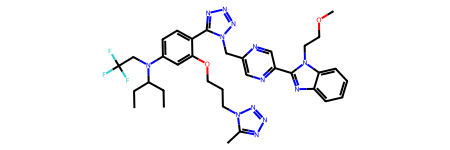

1. Multi-step retrosynthesis...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(-c3nc4ccccc4n3CCOC)cn2)c(OCCCn2nnnc2C)c1 get 20 precursors...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1 get 14 precursors...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(C#N)c(OCCCn2nnnc2C)c1 get 10 precursors...
Molecule COC(=O)c1cnc(CI)cn1 get 0 precursors...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(O)c1 get 11 precursors...
Molecule Cc1nnnn1CCCO get 1 precursors...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCO)c1 get 15 precursors...
Molecule Cc1nnn[nH]1 get 0 precursors...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnn[nH]2)c(OCCCn2nnnc2C)c1 get 11 precursors...
Molecule CCC(CC)N(CC(F)(F)F)c1ccc(Br)c(OCCCn2nnnc2C)c1 get 9 precursors...
Molecule COC(=O)c1cnc(Cn2nnnc2Cl)cn1 get 2 precursors...
Molecule COC(=O)c1cnc(Cn2nnnc2-c2ccc(Cl)cc2OCCCn2nnnc2C)cn1 get 10 precursors...
Molecule COC(=O)c1cnc(Cn2nnnc2-c2ccc(Br)cc2OCCCn2nnnc2C)cn1 get 10 p

Molecule COCCn1c(-c2cnc(Cn3nnnc3-c3ccc(Cl)cc3OCCCn3nnnc3C)cn2)nc2ccccc21 get 16 precursors...
Molecule Cc1nnnn1CCCOc1cc(Cl)ccc1B1OC(C)(C)C(C)(C)O1 get 4 precursors...
Molecule Cc1nnnn1CCCOc1cc(Cl)ccc1-c1nnnn1Cc1cnc(B2OC(C)(C)C(C)(C)O2)cn1 get 10 precursors...
Molecule COCCn1c(-c2cnc(Cn3nnnc3-c3ccc(O)cc3OCCCn3nnnc3C)cn2)nc2ccccc21 get 15 precursors...
Molecule COCCn1c(-c2cnc(Cn3nnnc3-c3ccc(Br)cc3OCCCn3nnnc3C)cn2)nc2ccccc21 get 16 precursors...
Molecule Cc1nnnn1CCCOc1cc(Br)ccc1B1OC(C)(C)C(C)(C)O1 get 4 precursors...
Molecule Cc1nnnn1CCCOc1cc(Br)ccc1-c1nnnn1Cc1cnc(B2OC(C)(C)C(C)(C)O2)cn1 get 10 precursors...
Molecule COCCn1c(-c2cnc(Cn3nnnc3-c3ccc(I)cc3OCCCn3nnnc3C)cn2)nc2ccccc21 get 15 precursors...
Molecule Cc1nnnn1CCCOc1cc(I)ccc1B1OC(C)(C)C(C)(C)O1 get 3 precursors...
Molecule Cc1nnnn1CCCOc1cc(I)ccc1-c1nnnn1Cc1cnc(B2OC(C)(C)C(C)(C)O2)cn1 get 9 precursors...
Molecule COCCn1c(-c2cnc(Cn3nnnc3-c3ccc(NCC(F)(F)F)cc3OCCCn3nnnc3C)cn2)nc2ccccc21 get 19 precursors...
Molecule COCCn1c(-c2cnc(Cn3nn

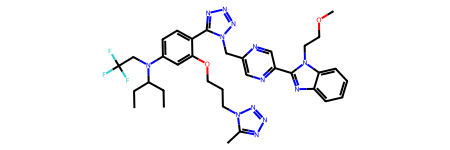

Rank 2: CCC(CC)N(CC(F)(F)F)c1ccc(-c2ccccc2-c2nnnn2Cc2cnc(-c3nc4ccccc4n3CCOC)cn2)c(OCCCn2nnnc2C)c1
Distance=0.36, Similarity=0.98
Reference: COCCNc1ccccc1N.CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1
Building blocks: COCCNc1ccccc1N.CCC(CC)N(CC(F)(F)F)c1ccc(-c2ccccc2-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1;R1
Precursors for building blocks: {'CCC(CC)N(CC(F)(F)F)c1ccc(-c2ccccc2-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1': 'COC(=O)c1cnc(CO)cn1.CCC(CC)N(CC(F)(F)F)c1ccc(-c2ccccc2-c2nnn[nH]2)c(OCCCn2nnnc2C)c1;R31'}


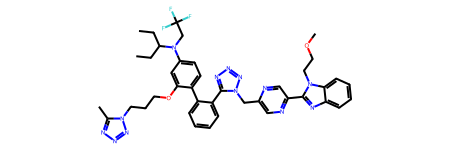

Rank 3: CCC(CN)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(-c3nc4ccccc4n3CCOC)cn2)c(OCCCn2nnnc2C)c1
Distance=0.74, Similarity=0.97
Reference: COCCNc1ccccc1N.CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1
Building blocks: COCCNc1ccccc1N.CCC(CN)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1;R1
Precursors for building blocks: {'CCC(CN)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1': 'CCC(=O)CN.COC(=O)c1cnc(Cn2nnnc2-c2ccc(NCC(F)(F)F)cc2OCCCn2nnnc2C)cn1;R71'}


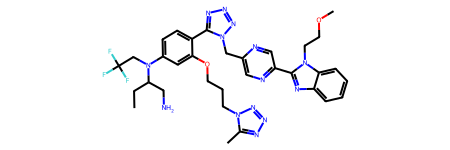

Rank 4: CCC(CO)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(-c3nc4ccccc4n3CCOC)cn2)c(OCCCn2nnnc2C)c1
Distance=0.99, Similarity=0.96
Reference: COCCNc1ccccc1N.CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1
Building blocks: COCCNc1ccccc1N.CCC(CO)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1;R1
Precursors for building blocks: {'CCC(CO)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1': 'COC(=O)c1cnc(Cn2nnnc2-c2ccc(Cl)cc2OCCCn2nnnc2C)cn1.CCC(CO)NCC(F)(F)F;R41'}


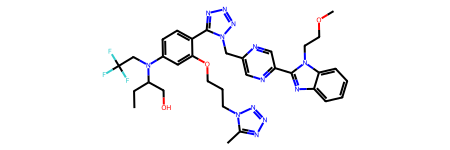

Rank 5: CCC(CCl)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(-c3nc4ccccc4n3CCOC)cn2)c(OCCCn2nnnc2C)c1
Distance=0.74, Similarity=0.96
Reference: COCCNc1ccccc1N.CCC(CC)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1
Building blocks: COCCNc1ccccc1N.CCC(CCl)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1;R1
Precursors for building blocks: {'CCC(CCl)N(CC(F)(F)F)c1ccc(-c2nnnn2Cc2cnc(C(=O)OC)cn2)c(OCCCn2nnnc2C)c1': 'CCC(=O)CCl.COC(=O)c1cnc(Cn2nnnc2-c2ccc(NCC(F)(F)F)cc2OCCCn2nnnc2C)cn1;R71'}


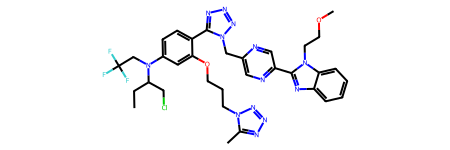

In [33]:
max_depth = 3
k = 5
fast = True
verbose = True
sort_by = 'similarity'

# 147 (65, 40)
# 79 (88, 36)
i = 0
target_smi = targets[i]
# target_smi = 'COC(C=C1)=CC=C1C2=CC=NC(NC3=CC=CC=C3)=N2'
print (target_smi)
display(Chem.MolFromSmiles(target_smi))
if test_on == 'synthesis':
    answers = test_df['synthesis']
    print (answers[i])
    gt_molecules = [smi for smi in answers[i].split(';') if smi[0] != 'R']
    print ('Solvable?', [smi in loader.bblocks_smi for smi in gt_molecules])
        
tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kd_bblocks=kd_bblocks, kdtrees=kd_trees, max_depth=max_depth, verbose=verbose)
analogs = tree.get_twins(k=k, fast=fast, sort_by=sort_by)
show_analogs(analogs)

CCOC(=O)Cc1cc2c(F)c(C3NCCc4c5c(cc(F)c43)COCO5)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O


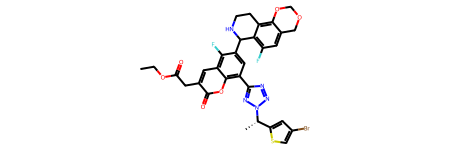

CN1CCC(C(=O)O)C(c2cnn(C)c2)C1.Nc1ccc(Br)nc1O;R5;CC(O)C(C)Br;R73;Clc1cccc(C#CCBr)c1;R25;R89;R8
1. Multi-step retrosynthesis...
Molecule CCOC(=O)Cc1cc2c(F)c(C3NCCc4c5c(cc(F)c43)COCO5)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O get 10 precursors...
Molecule CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O get 9 precursors...
Molecule CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3nn[nH]n3)c2oc1=O get 7 precursors...
Molecule CCOC(=O)Cc1cc2c(F)c(C=O)cc(Br)c2oc1=O get 6 precursors...
Molecule C[C@@H](c1cc(Br)cs1)n1nnc(Cl)n1 get 3 precursors...
Molecule C[C@@H](c1cc(Br)cs1)n1nnc(-c2cc(C=O)c(F)cc2O)n1 get 9 precursors...
Molecule CCOC(=O)CC(C=O)C(=O)OCc1ccccc1 get 6 precursors...
Molecule C[C@@H](c1cc(Br)cs1)n1nnc(-c2cc(C=O)c(F)c3cc(Br)c(=O)oc23)n1 get 7 precursors...
Molecule CCOC(=O)CB1OC(C)(C)C(C)(C)O1 get 0 precursors...
Molecule C[C@@H](c1cc(Br)cs1)n1nnc(Br)n1 get 3 precursors...
Molecule CCOC(=O)Cc1cc2c(F)c(C=O)cc(B3OC(C)(C)C(C)(C)O3)c2oc1=O get 3 precursors...
Molecule CCOC(=O)Cc1cc2c(F)

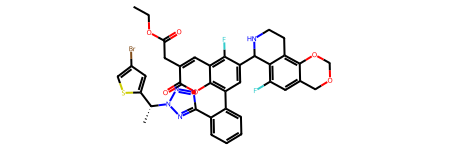

Rank 2: CCOC(=O)Cc1cc2c(F)c(C3NCCc4c5c(cc(F)c43)COCO5)cc(-c3ccccc3-c3nnn(C(C)c4cc(Br)cs4)n3)c2oc1=O
Distance=1.01, Similarity=0.96
Reference: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O
Building blocks: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccccc3-c3nnn(C(C)c4cc(Br)cs4)n3)c2oc1=O;R0
Precursors for building blocks: {'CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccccc3-c3nnn(C(C)c4cc(Br)cs4)n3)c2oc1=O': 'CC(O)c1cc(Br)cs1.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccccc3-c3nn[nH]n3)c2oc1=O;R34'}


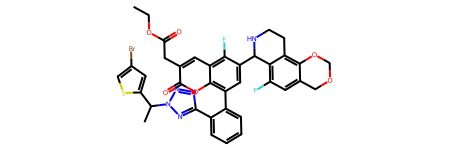

Rank 3: CCOC(=O)Cc1cc2c(F)c(C3NCCc4c5c(cc(F)c43)COCO5)cc(-c3ccccc3-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O
Distance=1.01, Similarity=0.96
Reference: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O
Building blocks: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccccc3-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O;R0
Precursors for building blocks: {'CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccccc3-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O': 'C[C@H](O)c1cc(Br)cs1.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccccc3-c3nn[nH]n3)c2oc1=O;R34'}


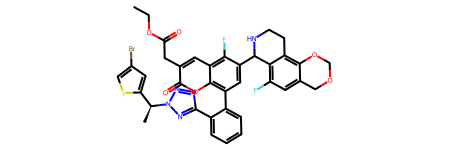

Rank 4: CCOC(=O)Cc1cc2c(F)c(C3NCCc4c5c(cc(F)c43)COCO5)cc(-c3ccc(-c4nnn([C@H](C)c5cc(Br)cs5)n4)cc3)c2oc1=O
Distance=0.96, Similarity=0.96
Reference: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O
Building blocks: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccc(-c4nnn([C@H](C)c5cc(Br)cs5)n4)cc3)c2oc1=O;R0
Precursors for building blocks: {'CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccc(-c4nnn([C@H](C)c5cc(Br)cs5)n4)cc3)c2oc1=O': 'C[C@@H](O)c1cc(Br)cs1.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccc(-c4nn[nH]n4)cc3)c2oc1=O;R34'}


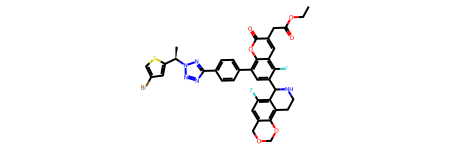

Rank 5: CCOC(=O)Cc1cc2c(F)c(C3NCCc4c5c(cc(F)c43)COCO5)cc(-c3ccc(-c4nnn(C(C)c5cc(Br)cs5)n4)cc3)c2oc1=O
Distance=0.96, Similarity=0.96
Reference: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3nnn([C@@H](C)c4cc(Br)cs4)n3)c2oc1=O
Building blocks: NCCc1cc(F)cc2c1OCOC2.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccc(-c4nnn(C(C)c5cc(Br)cs5)n4)cc3)c2oc1=O;R0
Precursors for building blocks: {'CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccc(-c4nnn(C(C)c5cc(Br)cs5)n4)cc3)c2oc1=O': 'CC(O)c1cc(Br)cs1.CCOC(=O)Cc1cc2c(F)c(C=O)cc(-c3ccc(-c4nn[nH]n4)cc3)c2oc1=O;R34'}


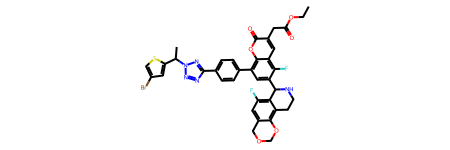

In [10]:
from scripts.syntree import SynTree
from scripts.chem_utils import *

top_k = 5
max_depth = 3
k = 5
fast = True
sort_by = 'similarity'

test_on = 'linear'
test_df = pd.read_csv('%s/test_files/test_%s.csv' % (data_dir, test_on))
targets = test_df['smiles']
answers = test_df['synthesis']

i = 0
target_smi = targets[i]
print (target_smi)
display(Chem.MolFromSmiles(target_smi))
print (answers[i])

tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kd_bblocks=kd_bblocks, kdtrees=kd_trees, max_depth=max_depth, verbose=True)
analogs = tree.get_twins(k=k, fast=fast, sort_by=sort_by)
# print (tree.target_node.children)

# print (tree.inference_time)
for i, (analog, result) in enumerate(analogs.items()):
    print ('Rank %d: %s' % (i+1, analog))
    print ('Distance=%.2f, Similarity=%.2f' % (result['distance'], result['similarity']))
    print ('Reference:', result['reference'])
    print ('Building blocks: %s;%s' % (result['bblocks'], result['reaction']))
    print ('Precursors for building blocks:', result['bb_precursors'])
    display(Chem.MolFromSmiles(analog))
    if i+1 == top_k:
        break

In [ ]:
from scripts.syntree import SynTree
from scripts.chem_utils import *

def get_top_analog(target_smi, k=5, max_depth=2, fast=False, sort_by='similarity'):
    tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kd_bblocks=kd_bblocks, kdtrees=kd_trees, max_depth=max_depth)
    analogs = tree.get_twins(k=k, sort_by=sort_by)
    return tree.target_node.children

def short_experiment(data_dir, test_on, fast=True, max_depth=1, k=1):
    test_path = '%s/test_%s.csv' % (data_dir, test_on)
    test_df = pd.read_csv(test_path)
    targets = test_df['smiles'].tolist()
    fail = 0
    for target in tqdm(targets, total=len(targets)):
        children = get_top_analog(target, k, max_depth)
        if not children:
            fail += 1
            print (target, fail)

    return fail

#chembl: 49
# short_experiment(data_dir, 'synthesis')

In [12]:
from scripts.syntree import SynTree
from scripts.chem_utils import *
from tqdm import tqdm
import numpy as np

def get_top_analog(target_smi, k=5, max_depth=2, fast=False, sort_by='similarity'):
    tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kd_bblocks=kd_bblocks, kdtrees=kd_trees, max_depth=max_depth)
    analogs = tree.get_twins(k=k, fast=fast, sort_by=sort_by)
    inference_time = tree.inference_time
    if len(analogs) == 0:
        analog, result = None, None
    else:
        analog, result = [item for item in analogs.items()][0]
    return analog, result, inference_time

def experiment(data_dir, test_on, max_depth=1, k=1, fast=False):
    print ('Testing on %s data, max_depth=%d, k=%d...' % (test_on, max_depth, k))
    if fast:
        output_path = 'outputs/Noh/output_%s_%d_%d_fast.csv' % (test_on, max_depth, k)
    else:
        output_path = 'outputs/Noh/output_%s_%d_%d.csv' % (test_on, max_depth, k)
    if os.path.exists(output_path):
        print ('Output already exists!')
        df = pd.read_csv(output_path)
        successes = df['Success'].tolist()
        similarities = df['Similarity'].tolist()
    else:
        
        test_path = '%s/test_files/test_%s.csv' % (data_dir, test_on)
        test_df = pd.read_csv(test_path)
        targets = test_df['smiles'].tolist()

        successes = []
        similarities = []
        pred_analogs = []
        pred_synthesis = []
        pred_precursors = []
        inference_time_1 = []
        inference_time_2 = []
        inference_time_3 = []

        success = 0
        for target in tqdm(targets, total=len(targets)):
            analog, result, inference_time = get_top_analog(target, k, max_depth, fast)

            if not analog:
                successes.append(0)
                analog, prediction, precursor, similarity = None, None, None, 0
            else:
                successes.append(1)
                similarity = round(result['similarity'], 2)
                precursor = result['bb_precursors']
                prediction = '%s;%s' % (result['bblocks'], result['reaction'])

            pred_analogs.append(analog)
            similarities.append(similarity)
            pred_synthesis.append(prediction)
            pred_precursors.append(precursor)
            inference_time_1.append(round(inference_time['retrosynthesis'], 2))
            inference_time_2.append(round(inference_time['knn'], 2))
            inference_time_3.append(round(inference_time['synthesis'], 2))

        output_df = pd.DataFrame({
            'Target': targets,
            'Success': successes,
            'Analog': pred_analogs,
            'Similarity': similarities,
            'Synthesis': pred_synthesis,
            'Precursors': pred_precursors,
            'retrosynthesis_time': inference_time_1,
            'knn_time': inference_time_2,
            'synthesis_time': inference_time_3
        })
        output_df.to_csv(output_path, index=None)
    
    print ('Success rate:', np.mean(successes))
    print ('Mean similarity:', np.mean(similarities))
    print ('Reconstruction rate:', np.mean([s==1 for s in similarities]))
    print ('###############################')
    
    return 

fast = True
# upper bound: 28.6%
for max_depth in [3]:
    for k in [5]:
        for test_on in ['chembl', 'linear', 'converge']:
            experiment(data_dir, test_on, max_depth, k, fast)

Testing on chembl data, max_depth=3, k=5...


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:19:27<00:00,  8.37s/it]


Success rate: 0.903
Mean similarity: 0.7205699999999999
Reconstruction rate: 0.183
###############################
Testing on linear data, max_depth=3, k=5...


100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [28:00:52<00:00, 100.85s/it]


Success rate: 1.0
Mean similarity: 0.93021
Reconstruction rate: 0.488
###############################
Testing on converge data, max_depth=3, k=5...


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [16:17:12<00:00, 58.63s/it]

Success rate: 1.0
Mean similarity: 0.9920599999999999
Reconstruction rate: 0.941
###############################


In [ ]:
'''
Chembl (3hr 25 mins):
Success rate: 0.903
Mean similarity: 0.7246600000000001
Reconstruction rate: 0.189

linear (41hr 24 mins):
cannot finish

converge: (41hr 19 mins)
Success rate: 1.0
Mean similarity: 0.9971700000000001
Reconstruction rate: 0.973
---

Chembl (2hr 19 mins):
Success rate: 0.903
Mean similarity: 0.7205699999999999
Reconstruction rate: 0.183

Linear (28hr 00 mins):
Success rate: 1.0
Mean similarity: 0.93021
Reconstruction rate: 0.488

Converge (16hr 17 mins):
Success rate: 1.0
Mean similarity: 0.9920599999999999
Reconstruction rate: 0.941
'''

In [16]:
def sanitize(mol):
    return Chem.MolFromSmiles(Chem.MolToSmiles(mol))

def sanitize_mols(mols):
    mols = [sanitize(mol) for mol in mols]
    return [mol for mol in mols if mol]

def map_reactants(mols):
    max_map = 0
    new_mols = []
    for mol in mols:
        for atom in mol.GetAtoms():
            max_map += 1
            atom.SetAtomMapNum(max_map)
        new_mols.append(mol)
    return new_mols

def validate(mol):
    smi = Chem.MolToSmiles(mol)
    return Chem.MolFromSmiles(smi)

def use_reaction(rxn, reactants):
    products = [validate(p[0]) for p in rxn.rxn.RunReactants(reactants)]
    products = [p for p in products if p]
    return products

    
def make_mapped_reaction(i, synthesis, reaction_dict):
    actions = synthesis.split(';')
    products = []
    mapped_rxns = []
    reactant_mols = [[]]
    for action in actions:
        if 'R' not in action: # reaction
            new_mols = [Chem.MolFromSmiles(smi) for smi in action.split('.')]
            for reactant_mol in reactant_mols:
                reactant_mol += new_mols
            
        if 'R' in action: # reaction
            rxn = reaction_dict[action]
            obtained_products = []
            for reacant_mol in reactant_mols:
                for mols in [reacant_mol, reacant_mol[::-1]]:
                    reactant_smi = '.'.join([Chem.MolToSmiles(mol) for mol in mols]) 
                    product_mols = use_reaction(rxn, mols)
                    for mol in product_mols:
                        product_smi = Chem.MolToSmiles(mol)
                        if product_smi in products:
                            continue
                        products.append(product_smi)
                        mapped_rxn = '%s>>%s' % (reactant_smi, product_smi)
                        mapped_rxns.append(mapped_rxn)
                        obtained_products.append(mol)

            reactant_mols = []
            for product in obtained_products:
                reactant_mols.append([product])
            
    return mapped_rxns

# reaction_dict = {'R%d' % (int(v.split('R')[-1])+1): Reaction(k) for k, v in loader.template_refs.items()}
reaction_dict = loader.work_rxns
test_on = 'synthesis'
test_df = pd.read_csv('%s/test_%s.csv' % (data_dir, test_on))
answers = test_df['synthesis']
targets = test_df['smiles']

import tqdm
from rdkit import Chem

def demap(smi):
    mol = Chem.MolFromSmiles(smi)
    [atom.SetAtomMapNum(0) for atom in mol.GetAtoms()]
    return Chem.MolToSmiles(mol)
    
def get_sequence(target, synthesis, reactions):
    bblocks = [demap(b) for b in synthesis.split(';') if 'R' not in b]
    obtained_sequence = []
    for reaction in reactions[::-1]:
        reactants, products = reaction.split('>>')
        prev_products = [smi for smi in reactants.split('.') if smi not in bblocks]
        if prev_products:
            prev_product = prev_products[0]
            if products == target:
                obtained_sequence.append(reaction)
                target = prev_product
        elif products == target:
            obtained_sequence.append(reaction)
    return obtained_sequence[::-1]

answer_mapped_rxns = []
for i, synthesis in tqdm.tqdm(enumerate(answers), total=len(answers)):
    mapped_rxns = make_mapped_reaction(i, synthesis, reaction_dict)
    if mapped_rxns:
        obtained_products = [rxn.split('>>')[-1] for rxn in mapped_rxns]
        target = demap(targets[i])
        
        if target not in obtained_products:
            print (i, 'Different product')
            print (synthesis)
            print (obtained_products)
            print (target)
        sequence = get_sequence(target, synthesis, mapped_rxns)
        answer_mapped_rxns.append(sequence)
        if len(sequence) != synthesis.count('R'):
            print (i, len(sequence), synthesis.count('R'))
#     break
len(answer_mapped_rxns)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 193.19it/s]


1000

In [19]:
i = 235
print (answers[i])
answer_mapped_rxns[i]

N#CCNC(=O)CCl;CO/C=C/C(C)=O;R40


['CO/C=C/C(C)=O.N#CCNC(=O)CCl>>CO/C=C/C(C)=CC(=O)NCC#N']

In [11]:
from rdkit.Chem import AllChem

mols = ['COC(=O)CC=Cc1ccc(CC(=O)OC)c(F)c1F', 'CCCCn1c(N)c(NCCOC)c(=O)[nH]c1=O']
mols = [Chem.MolFromSmiles(mol) for mol in mols]
template= '[c;r6:1](-[NH1;$(N-[#6]):2]):[c;r6:3](-[NH2:4]).[#6:6]-[C;R0:5](=[OD1])-[#8;H1,$(O-[CH3])]>>[c:3]2:[c:1]:[n:2]:[c:5](-[#6:6]):[n:4]2'
reaction = AllChem.ReactionFromSmarts(template)
reaction.RunReactants(mols[::-1])

((<rdkit.Chem.rdchem.Mol at 0x2811db34090>,),
 (<rdkit.Chem.rdchem.Mol at 0x2811db34210>,))

In [18]:
from scripts.template_extractor import extract_retro_template
from rdkit import Chem

answer_retro_templates = []
for rxns in tqdm.tqdm(answer_mapped_rxns, total=len(answer_mapped_rxns)):
    if not rxns:
        answer_retro_templates.append(['X'])
    else:
        answer_retro_templates.append([extract_retro_template(rxn) for rxn in rxns])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


TypeError: argument of type 'NoneType' is not iterable

In [37]:
templates = []
bblocks = []
for a in answers:
    for k in a.split(';'):
        if k[0] == 'R':
            if k not in templates:
                templates.append(k)
        elif k not in bblocks:
            bblocks.append(k)
            
templates

['R69',
 'R76',
 'R24',
 'R72',
 'R1',
 'R61',
 'R83',
 'R28',
 'R10',
 'R9',
 'R65',
 'R75',
 'R60',
 'R71',
 'R58',
 'R4',
 'R47',
 'R81',
 'R15',
 'R38',
 'R40',
 'R12',
 'R57',
 'R80',
 'R87',
 'R11',
 'R79',
 'R59',
 'R25',
 'R2',
 'R89',
 'R14',
 'R41',
 'R70',
 'R5',
 'R30',
 'R64',
 'R36',
 'R74',
 'R42',
 'R68',
 'R37',
 'R48',
 'R34',
 'R8',
 'R13',
 'R85',
 'R35',
 'R33',
 'R26',
 'R73',
 'R88',
 'R29',
 'R44',
 'R62',
 'R90',
 'R6',
 'R86',
 'R84']

In [14]:
loader_templates = loader.retro_df['Retro_template'].tolist()
known_templates = [all([template in loader_templates for template in templates]) for templates in answer_retro_templates]
solvable_problems = [i for i, solve in enumerate(known_templates) if solve]
upper_bound = sum(known_templates)
upper_bound

699

41 CSCCCC(N)=O;CC1(COC(=O)CO)CC1;R69
([C:2]-[C:1](=[O:3])-[CH:5](-[C:4])-[C:6])>>(C-C1(-C-O-[C:1](-[C:2])=[O:3])-C-C-1).([C:4]-[CH2:5]-[C:6])


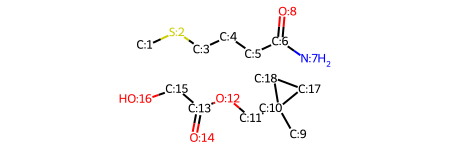

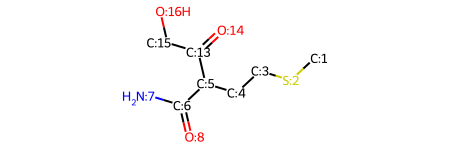


115 NCCOCC(N)=O;R90
(N#[C:1]-[C:2])>>(N-[CH2:1]-[C:2])


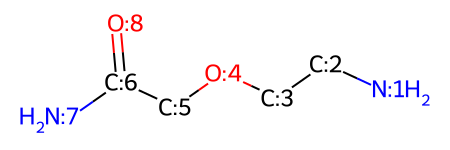

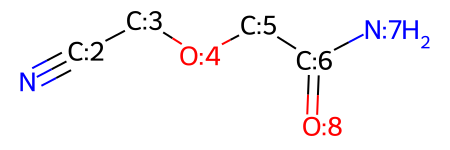


221 NOCC(=O)O;COCCNC(=O)CC#N;R15
([CH2:1]-c1:[n:3]:[c:2](-[CH2:5]):[nH:4]:n:1)>>([CH2:1]-[C:2]#[N:3]).(O-[C:4](=O)-[CH2:5])


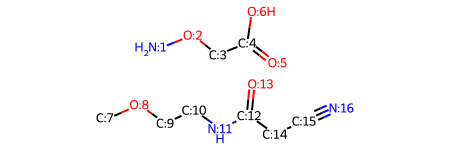

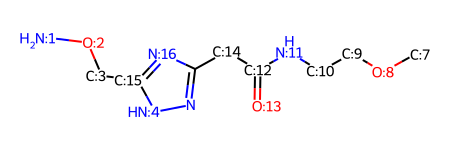


225 COCCCC(C)=O;CC(=O)OCCBr;R40
([C:5]-[CH:4]=[C:1](-[C:2])-[C:3])>>(O=[C:1](-[C:2])-[C:3]).(Br-[CH2:4]-[C:5])


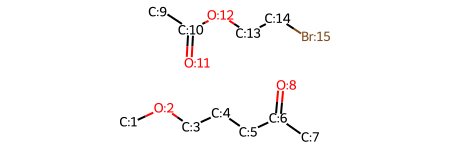

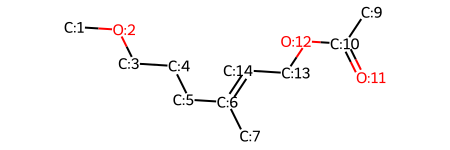


235 N#CCNC(=O)CCl;CO/C=C/C(C)=O;R40
([C:2]-[C:1](-[C:3])=[CH:4]-[C:5])>>(O=[C:1](-[C:2])-[C:3]).(Cl-[CH2:4]-[C:5])


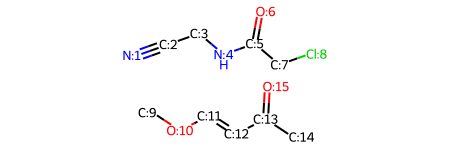

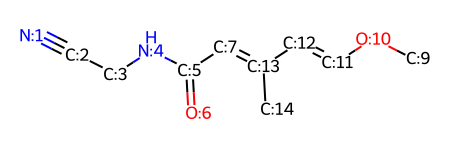


320 NC(=O)NC(=O)OCCCl;COC(=O)c1c(CC(=O)O)[nH]c(C(C)=O)c1C;R40
([C:2]-[C:1](-[c:3])=[CH:4]-[C:5])>>(O=[C:1](-[C:2])-[c:3]).(Cl-[CH2:4]-[C:5])


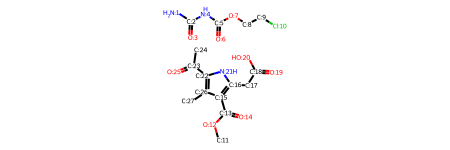

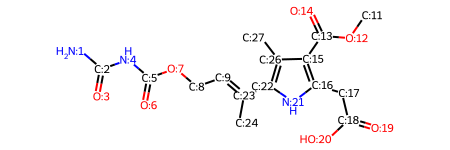


325 COCCNC(=N)N;COC(OC)C(Br)C(C)=O;R42
([c:1]1:[c:2]:[n:5]:[c:4]:[nH:3]:1)>>(Br-[CH:1]-[C:2]=O).([NH2:3]-[C:4]=[NH:5])


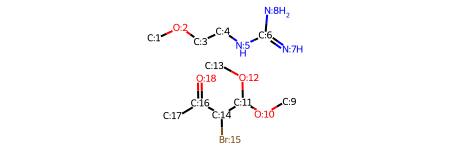

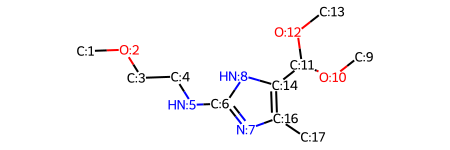


345 C=CC(=C)CCC(=O)C(=C)C;COC(=O)OCC#CCO;R60
([C:1]1=[C:2]-[CH2:3]-[CH:4]=[C:5]-[CH2:6]-1)>>([C:1]#[C:2]).([CH2:3]=[CH:4]-[C:5]=[CH2:6])


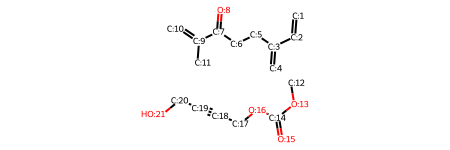

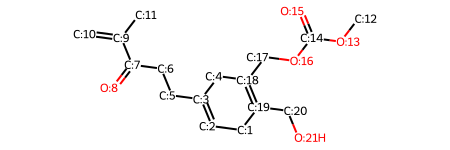


375 COC(=O)CC(=O)N(C)C;COC(=O)CCc1ccc(O)cc1;R64
([CH2:6]-[c:4](:[cH:5]):[cH:3]:c1:[c:2]:[o:1]:[c:7]:[cH:8]:[c:9]:1)>>(O-[c:1](:[cH:2]):[cH:3]:[cH:4]:[c:5]-[CH2:6]).(C-O-[C:7]-[CH2:8]-[C:9]=O)


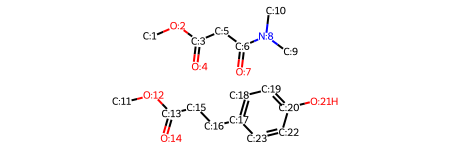

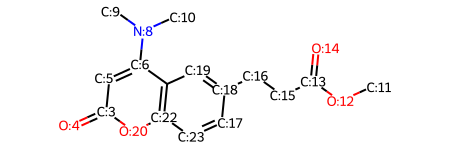


440 C=C(CCC(=O)OC)B1OC(C)(C)C(C)(C)O1;COC(=O)/C(Br)=C/Br;R72
([C:4]=[C:3](-[C:5])-[CH:1]=[C:2])>>(Br/[CH:1]=[C:2]).(C-C1(-C)-O-B(-[C:3](=[C:4])-[C:5])-O-C-1(-C)-C)


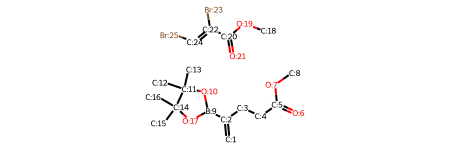

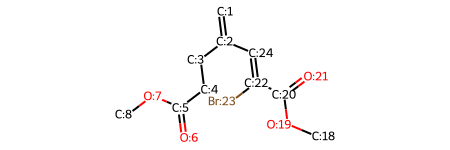


485 COC(=O)Cc1coc2cc(O)ccc12;COC(=O)CC(=O)NC(=O)OC;R64
([c:7]:[c:4](:[cH:6]):[c:3](:[o:5]):c1:[c:2]:[o:1]:[c:8]:[cH:9]:[c:10]:1)>>(O-[c:1](:[cH:2]):[cH:3]:[c:4](:[o:5]):[c:6]:[c:7]).(C-O-[C:8]-[CH2:9]-[C:10]=O)


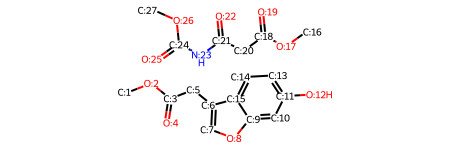

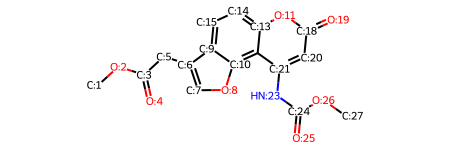


525 COC(=O)N(C)CCCl;CC(=O)CO;R40
([C:2]-[C:1](-[C:3])=[CH:4]-[C:5])>>(O=[C:1](-[C:2])-[C:3]).(Cl-[CH2:4]-[C:5])


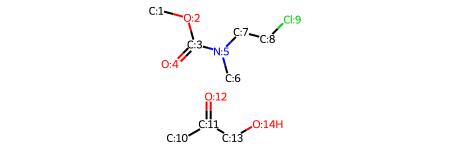

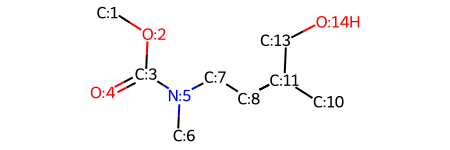


535 COP(=O)(OC)C(=[N+]=[N-])C(C)=O;COC(=O)CCCCCCCCCCBr;R40
([C:2]-[C:1](-[C:3])=[CH:4]-[C:5])>>(O=[C:1](-[C:2])-[C:3]).(Br-[CH2:4]-[C:5])


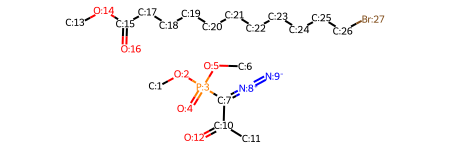

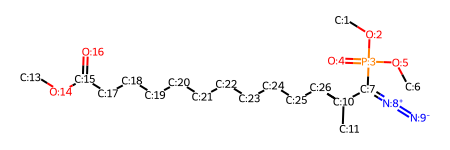


645 COC(=O)CCCS(C)(=O)=O;CCCCOC(=O)COC;R69
([C:2]-[C:1](=[O:3])-[CH:5](-[C:4])-[C:6])>>(C-C-C-C-O-[C:1](-[C:2])=[O:3]).([C:4]-[CH2:5]-[C:6])


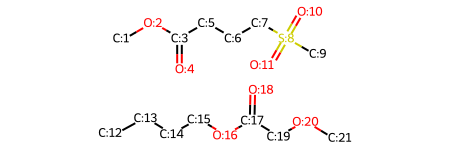

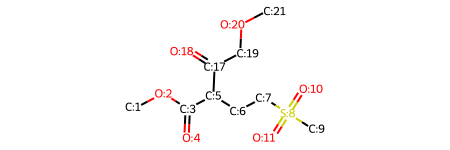


650 NNC(=O)CCO;COC(=O)CC#N;R14
([CH2:1]-[c:4]1:[n:3]:[c:2](-[CH2:5]):[nH:7]:[n:6]:1)>>([CH2:1]-[C:2]#[N:3]).(O=[C:4](-[CH2:5])-[NH:6]-[NH2:7])


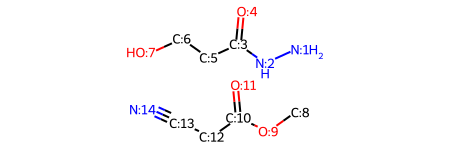

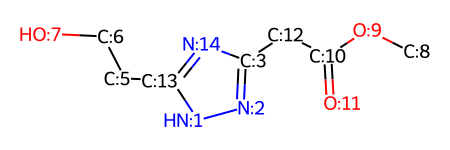


660 COCCCNC(=N)N;COC(OC)C(Br)C(C)=O;R42
([c:1]1:[c:2]:[n:5]:[c:4]:[nH:3]:1)>>(Br-[CH:1]-[C:2]=O).([NH2:3]-[C:4]=[NH:5])


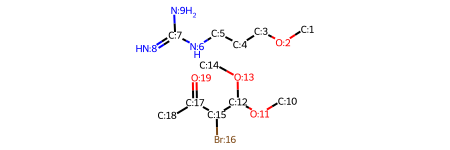

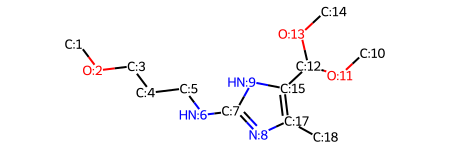


705 COC(=O)CC(=O)CC(C)C;COC(=O)Cc1ccc(O)cc1Cl;R64
([CH2:5]-[c:3]1:[cH:2]:c2:[c:11]:[cH:10]:[c:9]:[o:1]:[c:8]:2:[cH:6]:[c:4]:1-[Cl:7])>>(O-[c:1]1:[cH:2]:[cH:3]:[c:4](-[CH2:5]):[c:6](-[Cl:7]):[cH:8]:1).(C-O-[C:9]-[CH2:10]-[C:11]=O)


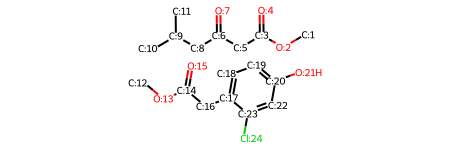

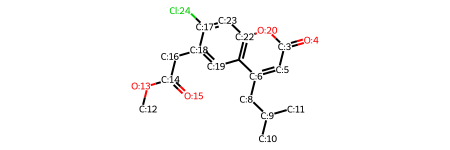


725 CNC(=O)NCCCO;R90
(N#[C:1]-[C:2])>>(O-[CH2:1]-[C:2])


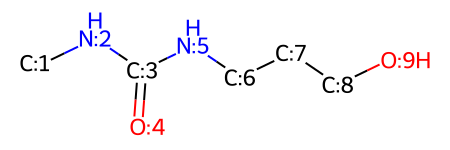

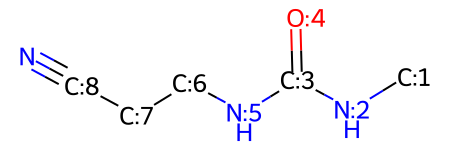


740 CSCC(=O)NN;COCCNC(=O)CC#N;R14
([CH2:1]-[c:4]1:[n:3]:[c:2](-[CH2:5]):[nH:7]:[n:6]:1)>>([CH2:1]-[C:2]#[N:3]).(O=[C:4](-[CH2:5])-[NH:6]-[NH2:7])


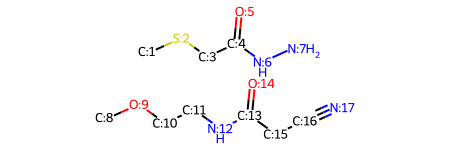

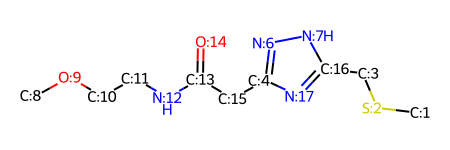


825 NCCC(=O)NN;COC(=O)C(O)CC#N;R14
([CH2:1]-[c:4]1:[n:3]:[c:2](-[CH2:5]):[nH:7]:[n:6]:1)>>([CH2:1]-[C:2]#[N:3]).(O=[C:4](-[CH2:5])-[NH:6]-[NH2:7])


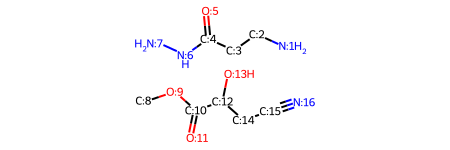

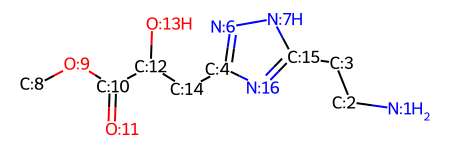


830 CCC(C)(CBr)C(=O)OC;CC(=O)CCN(C)C;R40
([C:2]-[C:1](-[C:3])=[CH:4]-[C:5])>>(O=[C:1](-[C:2])-[C:3]).(Br-[CH2:4]-[C:5])


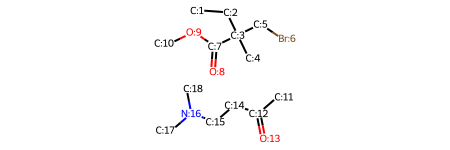

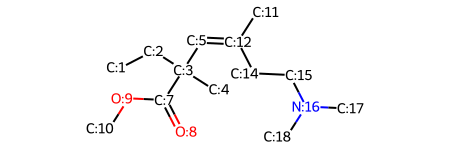


845 CNC(=O)CCCCN;R90
(N#[C:1]-[C:2])>>(N-[CH2:1]-[C:2])


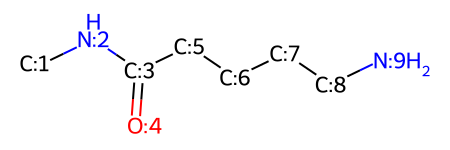

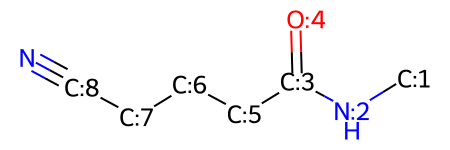


865 COC(=O)CCNS(=O)(=O)c1ccc(N)cc1;CC(=O)Cc1c(C)c(C)c(Br)c(C)c1C;R41
([c:5]-[NH:4]-[c:1](:[c:2]):[c:3])>>(Br-[c:1](:[c:2]):[c:3]).([NH2:4]-[c:5])


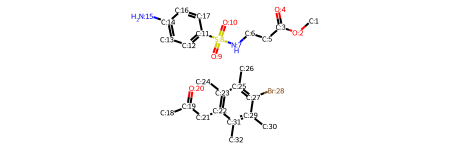

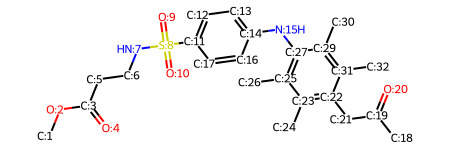


985 COC(=O)Cc1nnc(CN)s1;COC(=O)C(CCC#N)C(=O)OC;R15
([CH2:1]-c1:[n:3]:[c:2](-[CH2:5]):[nH:4]:n:1)>>([CH2:1]-[C:2]#[N:3]).(C-O-[C:4](=O)-[CH2:5])


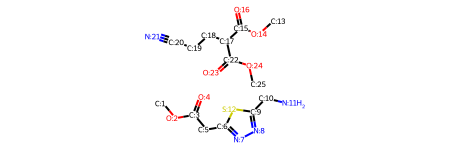

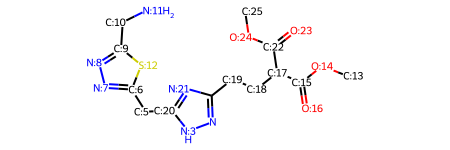

In [15]:
for i, templates in enumerate(answer_retro_templates):
    if i not in solvable_problems and answers[i].count(';R') == 1:
        print (i, answers[i])
        for t in templates:
            if t not in loader_templates:
                print (t)
        rxn = answer_mapped_rxns[i][-1]
        for s in rxn.split('>>'):
            display(Chem.MolFromSmiles(s))
        print ()

In [11]:
answers[6], answer_retro_templates[6]

('COC(=O)C(Br)CCC(Br)C(=O)OC;R65;C=CCNCCC(=O)OC;R75',
 ['([Br:4]-[C:5](-[C:6])(-[CH2:7])-[C:1](-[CH:2])=[O:3])>>(C-O-[C:1](-[CH:2])=[O:3].[Br:4]-[CH:5](-[C:6])-[CH2:7])',
  '([C:4]-[C:3](-[C:5])(-[CH2:6])-[CH:1]=[CH:2])>>([CH2:1]=[CH:2]).(Br-[C:3](-[C:4])(-[C:5])-[CH2:6])'])

In [9]:
for i in solvable_problems:
    before_rxn = answers[i].split(';R')[0]
    if before_rxn.count('.') == 0 and before_rxn.count(';') == 0:
        print (i, answers[i])
        print (answer_retro_templates[i])

25 COC(=O)N(C)CCCC(=O)O;R83
['(Cl-[C:1](-[CH2:2])=[O:3])>>(O-[C:1](-[CH2:2])=[O:3])']
55 COCCOC(=O)CC#N;R8
['([CH2:1]-[c:2]1:[n:3]:[nH]:n:n:1)>>([CH2:1]-[C:2]#[N:3])']
60 COC(=O)NCCCO;R85
['(Cl-[CH2:1]-[CH2:2])>>(O-[CH2:1]-[CH2:2])']
111 CONCC(=O)O;R87
['(Br-[CH:2](-[C:1])-[NH:3])>>([C:1]-[CH2:2]-[NH:3])']
131 COC(=O)CCS(=O)(=O)[O-];R86;C#CCCCCOC(C)=O;R69
['(Cl-[S:2](-[CH2:1])(=[O:3])=[O:4])>>([CH2:1]-[S:2](-[O-])(=[O:3])=[O:4])', '([C:4]-[CH:5](-[CH2:6])-[C:1](-[CH3:2])=[O:3])>>(C#C-C-C-C-C-O-[C:1](-[CH3:2])=[O:3]).([C:4]-[CH2:5]-[CH2:6])']
135 C#CCOCCOCCOCCOCC(=O)O;R88
['(Cl-[CH:2](-[C:1])-[O:3])>>([C:1]-[CH2:2]-[O:3])']
140 CC(=O)CC(=O)OCCO;R84
['(Br-[CH2:1]-[CH2:2])>>(O-[CH2:1]-[CH2:2])']
160 COC(=O)C(Br)CCC(Br)C(=O)OC;R65
['([Br:4]-[C:5](-[C:6])(-[CH2:7])-[C:1](-[CH:2])=[O:3])>>(C-O-[C:1](-[CH:2])=[O:3].[Br:4]-[CH:5](-[C:6])-[CH2:7])']
166 COC(=O)CC#N;R8;COCCNC(=O)CC#N;R15
['([CH2:1]-[c:2]1:[n:3]:[nH]:n:n:1)>>([CH2:1]-[C:2]#[N:3])', '([CH2:1]-[c:2]1:[n:3]:[c:4](-[CH2:5]):[nH]:n:1)

In [ ]:
'CC(=O)SCI;COCCNC(=O)CC#N'

CC(=O)SCI


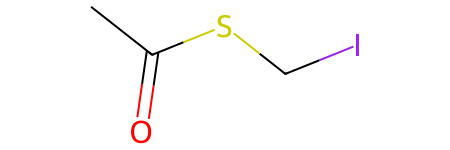

COCCNC(=O)CC#N


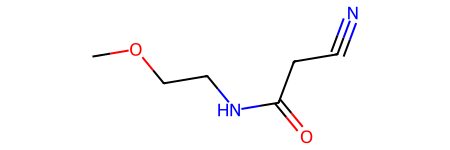

In [28]:
rxn = Reaction('[#16:2]-[CH2:1]-n1:[n:5]:[c:4](-[C:3]):n:n:1>>I-[CH2:1]-[#16:2].[C:3]-[C:4]#[N:5]')
results = rxn.rxn.RunReactants([Chem.MolFromSmiles('COCCNC(=O)CC1=NN(CSC(C)=O)N=N1')])
for mol in results[0]:
    print (Chem.MolToSmiles(mol))
    display(mol)

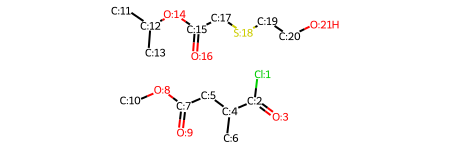

In [74]:
Chem.MolFromSmiles('[Cl:1][C:2](=[O:3])[CH:4]([CH2:5][C:7]([O:8][CH3:10])=[O:9])[CH3:6].[CH3:11][CH:12]([CH3:13])[O:14][C:15](=[O:16])[CH2:17][S:18][CH2:19][CH2:20][OH:21]')

In [10]:
result

{'reaction': 'R73',
 'reference': 'Brc1nc2ncccc2s1.CN(c1ccccc1)c1ccc(B2OC(C)(C)C(C)(C)O2)cn1',
 'bblocks': 'Brc1ncccn1.CC1(C)OB(c2ccc(N)nc2)OC1(C)C',
 'bb_precursors': {},
 'distance': 4.007515250210473,
 'similarity': 0.23529411764705882}

Rank 1: COc1cc(-c2nc(-c3ccccc3)c(C)s2)ccn1, distance=2.06, similarity=0.76


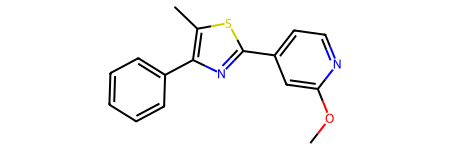

Rank 2: COc1cc(-c2nc(I)c(-c3ccccc3)s2)ccn1, distance=1.73, similarity=0.74


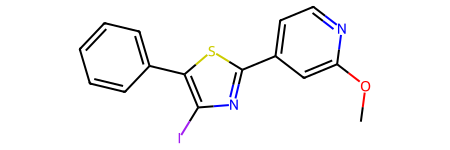

Rank 3: COc1cc(-c2nc(-c3ccccc3)c(Cl)s2)ccn1, distance=1.73, similarity=0.74


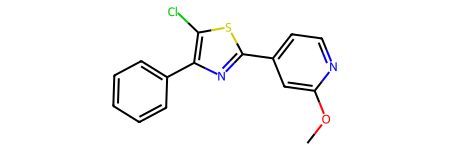

Rank 4: COc1cc(-c2nc(I)c(-c3ccc(-c4ccccc4)cc3)s2)ccn1, distance=2.26, similarity=0.71


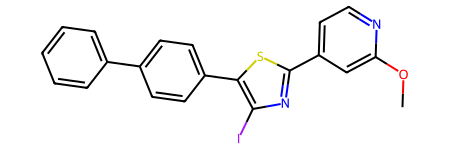

Rank 5: COc1cc(-c2nc(-c3ccc(-c4ccccc4)cc3)c(Cl)s2)ccn1, distance=2.26, similarity=0.71


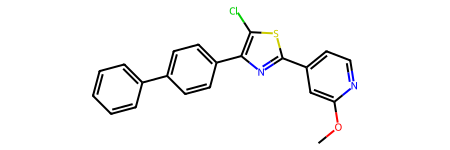

Rank 6: COc1cc(-c2nc(Cl)sc2-c2ccccc2)ccn1, distance=1.73, similarity=0.70


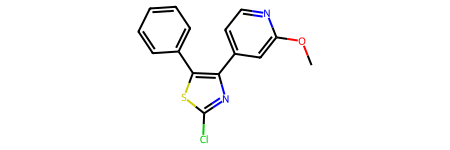

Rank 7: COc1cc(-c2sc(Cl)nc2-c2ccccc2)ccn1, distance=1.73, similarity=0.70


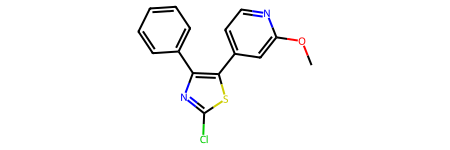

Rank 8: COc1cc(-c2ccc(-c3sc(N)nc3-c3ccccc3)cc2)ccn1, distance=1.63, similarity=0.70


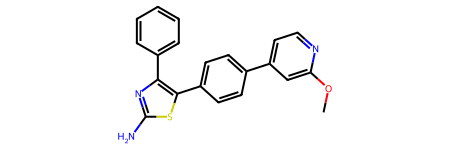

Rank 9: COc1cc(-c2nc(-c3ccccc3)c(S(N)(=O)=O)s2)ccn1, distance=2.40, similarity=0.68


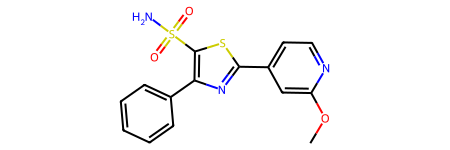

Rank 10: COc1cc(-c2ccc(-c3nc(-c4ccccc4)c(C)s3)cc2)ccn1, distance=1.73, similarity=0.67


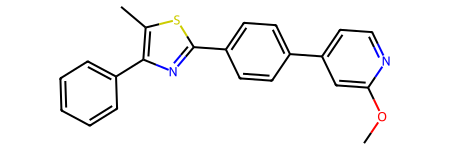

Rank 11: COc1cc(-c2nc(Cl)sc2-c2ccc(-c3ccccc3)cc2)ccn1, distance=2.26, similarity=0.67


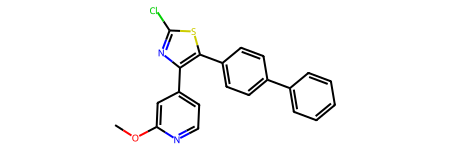

Rank 12: COc1cc(-c2sc(Cl)nc2-c2ccc(-c3ccccc3)cc2)ccn1, distance=2.26, similarity=0.67


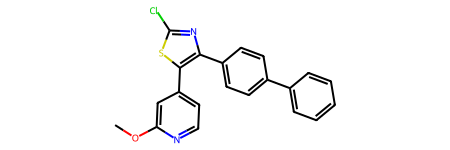

Rank 13: COc1cc(-c2nc(-c3ccccc3)sc2Cl)ccn1, distance=1.73, similarity=0.67


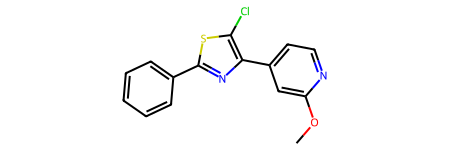

Rank 14: COc1cc(-c2sc(-c3ccccc3)nc2I)ccn1, distance=1.73, similarity=0.67


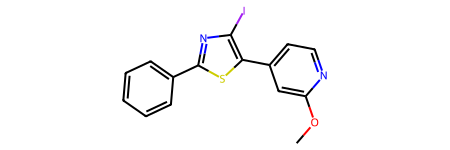

Rank 15: COc1cc(-c2nc(-c3ccccc3)c(S(=O)(=O)Cl)s2)ccn1, distance=2.58, similarity=0.67


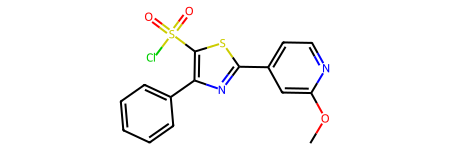

Rank 16: COc1cc(-c2nc(-c3ccc(-c4ccccc4)cc3)sc2Cl)ccn1, distance=2.26, similarity=0.64


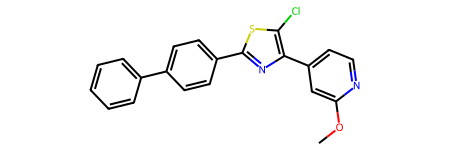

Rank 17: COc1cc(-c2sc(-c3ccc(-c4ccccc4)cc3)nc2I)ccn1, distance=2.26, similarity=0.64


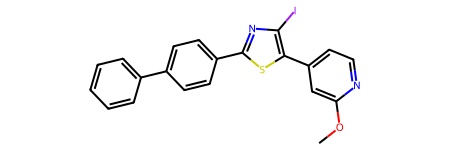

Rank 18: COc1cc(-c2nc(-c3ccc(Oc4ccccc4)cc3)c(Cl)s2)ccn1, distance=2.35, similarity=0.62


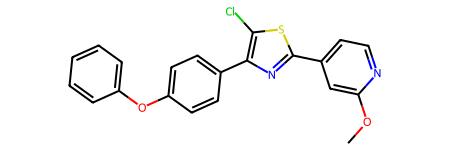

Rank 19: COc1cc(-c2nc(I)c(-c3ccc(Oc4ccccc4)cc3)s2)ccn1, distance=2.35, similarity=0.62


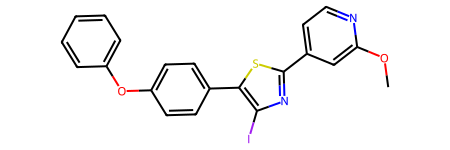

Rank 20: COc1cc(-c2nc(-c3ccc(Cl)cc3)c(Cl)s2)ccn1, distance=2.35, similarity=0.60


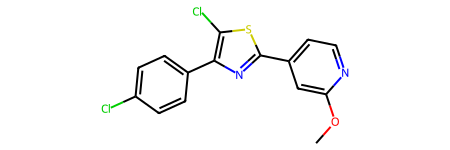

Rank 21: COc1cc(-c2ccccc2)ccn1, distance=2.68, similarity=0.59


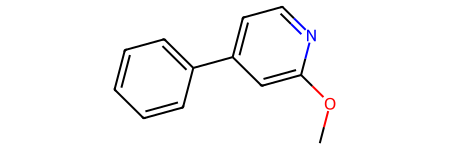

Rank 22: COc1cc(-c2nc(Cl)sc2-c2ccc(Oc3ccccc3)cc2)ccn1, distance=2.35, similarity=0.59


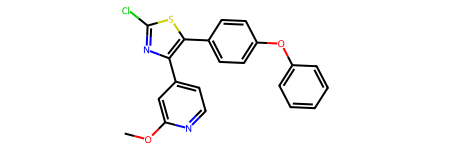

Rank 23: COc1cc(-c2sc(Cl)nc2-c2ccc(Oc3ccccc3)cc2)ccn1, distance=2.35, similarity=0.59


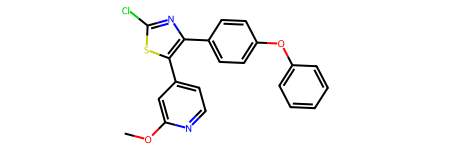

Rank 24: COc1cc(-c2nc(-c3ccccc3)ns2)ccn1, distance=2.24, similarity=0.59


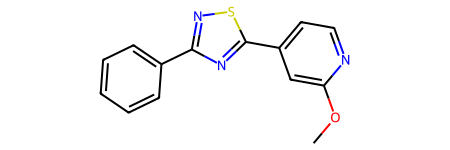

Rank 25: COc1cc(-c2ccc(-c3nnsc3-c3ccccc3)cc2)ccn1, distance=1.81, similarity=0.58


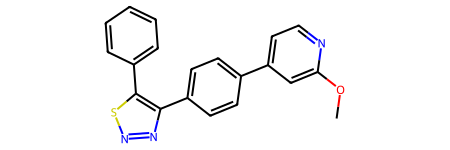

Rank 26: COc1cc(-c2ccc(-c3nnc(-c4ccccc4)s3)cc2)ccn1, distance=2.40, similarity=0.58


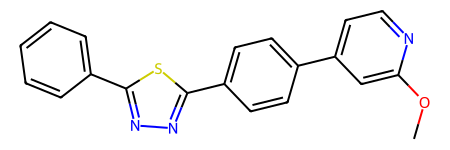

Rank 27: COc1cc(-c2ccc(-c3ccc(-c4ccccc4)cc3)cc2)ccn1, distance=1.89, similarity=0.57


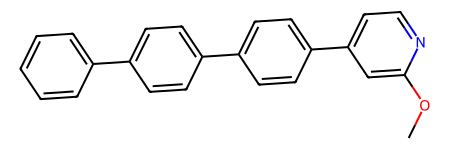

Rank 28: COc1cc(-c2ccc(-c3ccccc3)cc2)ccn1, distance=1.95, similarity=0.57


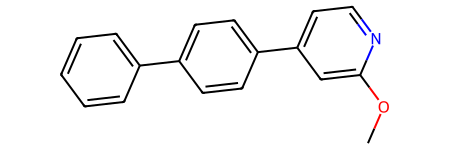

Rank 29: COc1cc(-c2nc(-c3ccccc3)nc(-c3ccccc3)n2)ccn1, distance=1.68, similarity=0.57


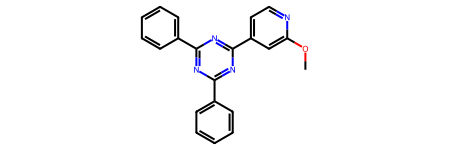

Rank 30: COc1cc(-c2nc(I)c(-c3ccc(S)cc3)s2)ccn1, distance=2.30, similarity=0.57


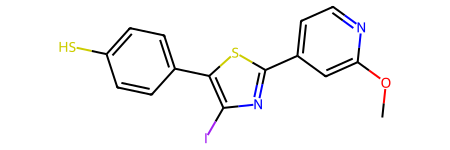

Rank 31: COc1cc(-c2nc(-c3ccc(S)cc3)c(Cl)s2)ccn1, distance=2.30, similarity=0.57


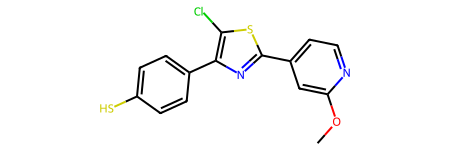

Rank 32: COc1cc(-c2nc(I)c(-c3ccc(Cl)cc3)s2)ccn1, distance=2.35, similarity=0.57


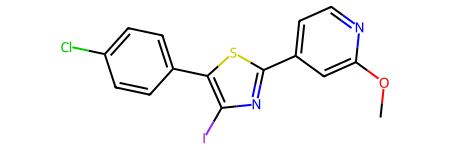

Rank 33: COc1cc(-c2sc(Cl)nc2-c2ccc(Cl)cc2)ccn1, distance=2.35, similarity=0.56


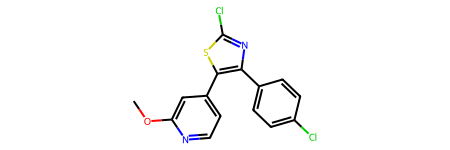

Rank 34: COc1cc(-c2nc(Cl)sc2-c2ccc(Cl)cc2)ccn1, distance=2.35, similarity=0.56


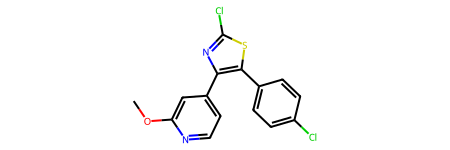

Rank 35: COc1cc(-c2nc(-c3ccc(Oc4ccccc4)cc3)sc2Cl)ccn1, distance=2.35, similarity=0.56


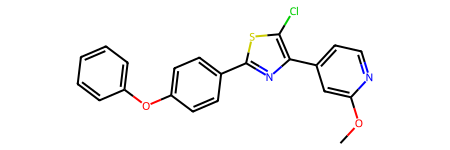

Rank 36: COc1cc(-c2sc(-c3ccc(Oc4ccccc4)cc3)nc2I)ccn1, distance=2.35, similarity=0.56


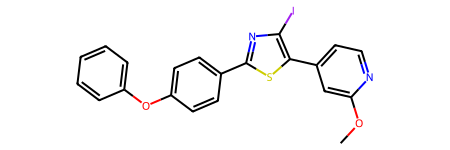

Rank 37: COc1cc(-c2ccc(-c3ccc(-c4ccccc4)s3)cc2)ccn1, distance=1.89, similarity=0.56


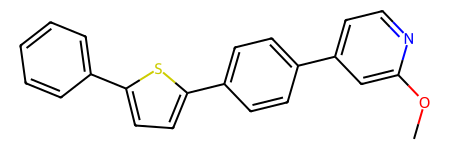

Rank 38: COc1cc(-c2nc(-c3ccccc3)nc(-c3ccc(-c4ccccc4)cc3)n2)ccn1, distance=2.20, similarity=0.55


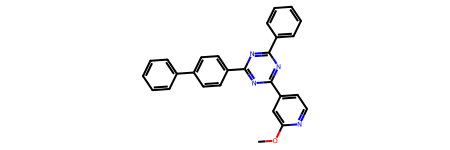

Rank 39: COc1cc(-c2nc(Cl)sc2-c2ccc(S)cc2)ccn1, distance=2.30, similarity=0.54


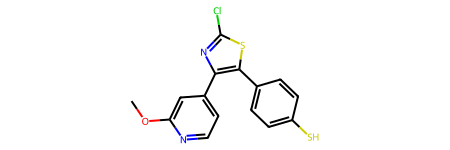

Rank 40: COc1cc(-c2sc(Cl)nc2-c2ccc(S)cc2)ccn1, distance=2.30, similarity=0.54


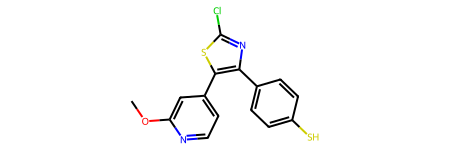

Rank 41: COc1cc(-c2nc(-c3ccc(Cl)cc3)sc2Cl)ccn1, distance=2.35, similarity=0.53


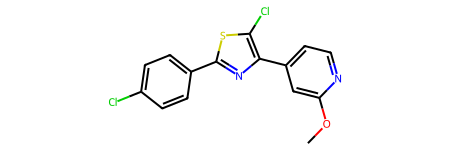

Rank 42: COc1cc(-c2ccc(-c3nc(-c4ccccc4)ns3)cc2)ccn1, distance=1.85, similarity=0.52


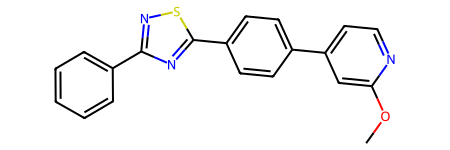

Rank 43: COc1cc(-c2nc(-c3ccc(S)cc3)sc2Cl)ccn1, distance=2.30, similarity=0.51


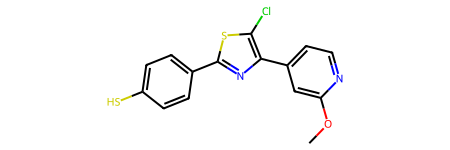

Rank 44: COc1cc(-c2sc(-c3ccc(S)cc3)nc2I)ccn1, distance=2.30, similarity=0.51


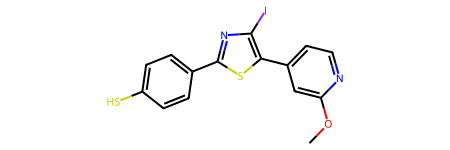

Rank 45: COc1cc(-c2sc(-c3ccc(Cl)cc3)nc2I)ccn1, distance=2.35, similarity=0.51


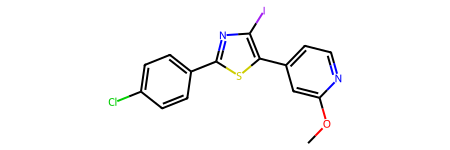

Rank 46: COc1cc(-c2nc(-c3ccccc3)nc(-c3ccc(S)cc3)n2)ccn1, distance=2.25, similarity=0.50


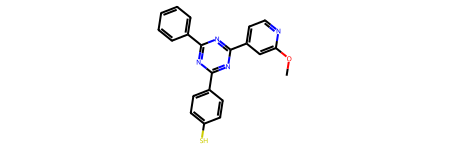

Rank 47: COc1cc(-c2ccc3ccccc3c2)ccn1, distance=3.99, similarity=0.50


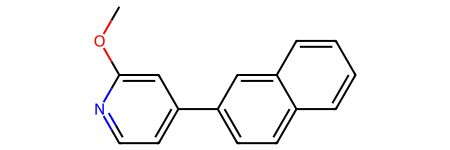

Rank 48: COc1cc(-c2nc(-c3ccccc3)nc(-c3ccc(Oc4ccccc4)cc3)n2)ccn1, distance=2.30, similarity=0.49


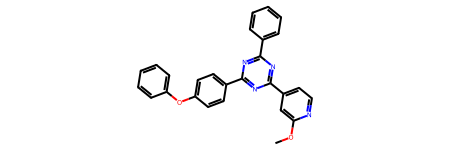

Rank 49: COc1cc(-c2ccc(-c3nc(Cl)sc3Cl)cc2)ccn1, distance=2.35, similarity=0.49


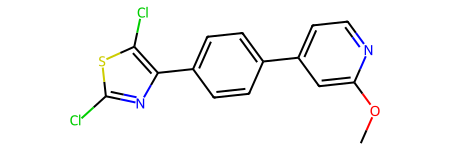

Rank 50: COc1cc(-c2ccc(-c3nc(I)c(Cl)s3)cc2)ccn1, distance=2.35, similarity=0.49


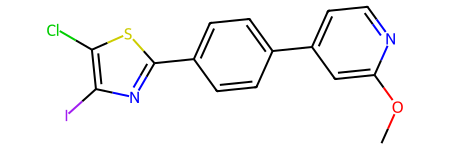

Rank 51: COc1cc(-c2ccc(-c3ccc4ccccc4c3)cc2)ccn1, distance=3.11, similarity=0.49


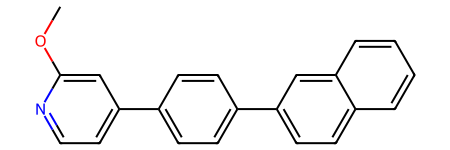

Rank 52: COc1cc(-c2ccc(-c3ccc(Oc4ccccc4)cc3)cc2)ccn1, distance=3.21, similarity=0.48


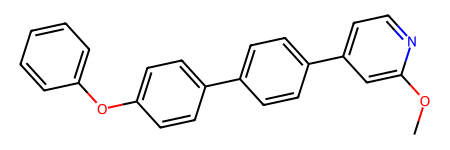

Rank 53: COc1cc(-c2ccc(Oc3ccccc3)cc2)ccn1, distance=4.16, similarity=0.48


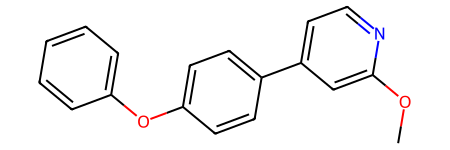

Rank 54: COc1cc(-c2ccc(-c3sc(Cl)nc3I)cc2)ccn1, distance=2.35, similarity=0.47


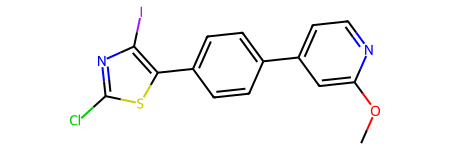

Rank 55: COc1cc(-c2ccc(-c3ccc(Cc4ccccc4)cc3)cc2)ccn1, distance=3.25, similarity=0.47


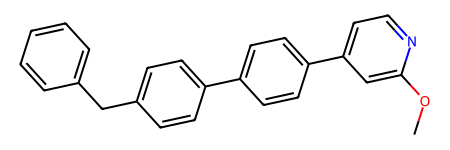

Rank 56: COc1cc(-c2ccc(Cc3ccccc3)cc2)ccn1, distance=4.21, similarity=0.47


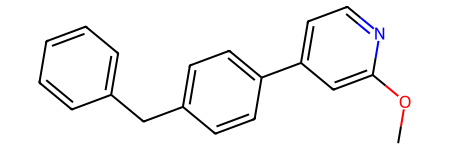

Rank 57: COc1cc(-c2ccc(-c3ccc(Br)cc3)cc2)ccn1, distance=3.00, similarity=0.45


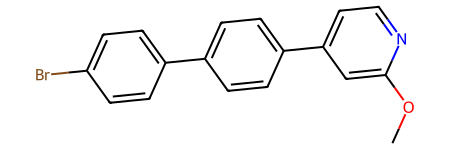

Rank 58: COc1cc(-c2ccc(Br)cc2)ccn1, distance=3.73, similarity=0.45


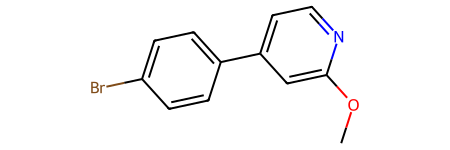

Rank 59: COc1cc(-c2ccc(-c3ccc(S)cc3)cc2)ccn1, distance=3.16, similarity=0.42


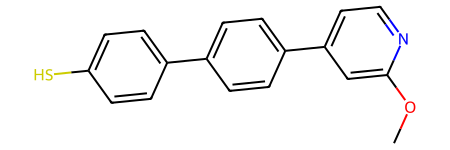

Rank 60: COc1cc(-c2ccc(-c3ccc(N)cc3)cc2)ccn1, distance=3.16, similarity=0.42


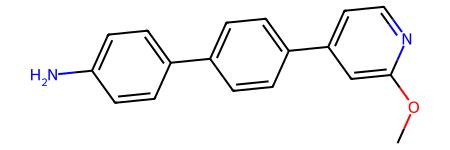

Rank 61: COc1cc(-c2ccc(-c3ccc(Cl)cc3)cc2)ccn1, distance=3.21, similarity=0.42


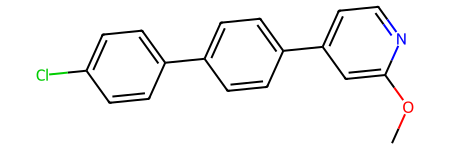

Rank 62: COc1cc(-c2ccc(N)cc2)ccn1, distance=3.89, similarity=0.42


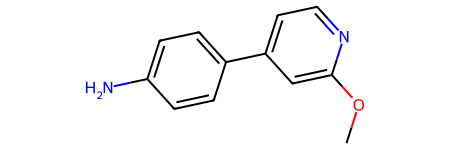

Rank 63: COc1cc(-c2ccc(S)cc2)ccn1, distance=4.11, similarity=0.42


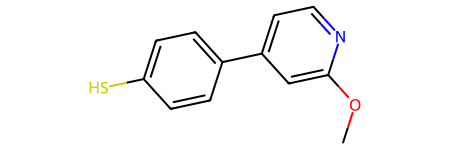

Rank 64: COc1cc(-c2ccc(Cl)cc2)ccn1, distance=4.16, similarity=0.42


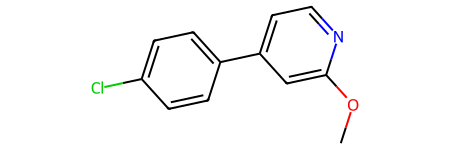

Rank 65: Nc1nc(-c2ccccc2)c(-c2ccccc2)s1, distance=2.74, similarity=0.42


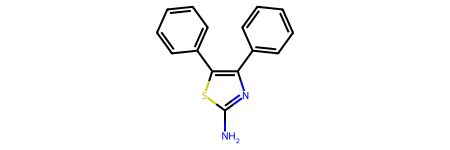

Rank 66: Nc1nc(-c2ccccc2)c(-c2ccc(-c3ccccc3)cc2)s1, distance=4.00, similarity=0.40


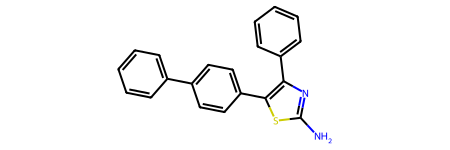

Rank 67: Nc1nc(-c2ccccc2)c(-c2ccc(Br)cc2)s1, distance=3.79, similarity=0.40


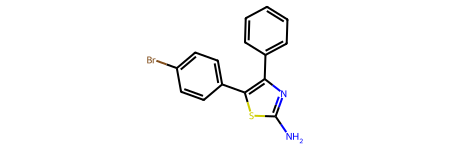

Rank 68: Nc1ccc(-c2sc(N)nc2-c2ccccc2)cc1, distance=3.95, similarity=0.38


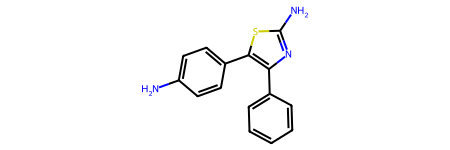

Rank 69: Nc1nc(-c2ccccc2)c(-c2ccc(Oc3ccccc3)cc2)s1, distance=4.24, similarity=0.38


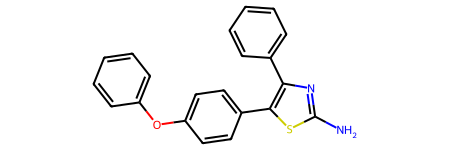

Rank 70: COc1cc(OC)nc(-c2ccc(-c3ccccc3)cc2)n1, distance=2.94, similarity=0.38


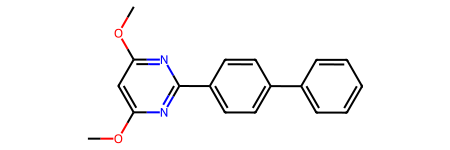

Rank 71: COc1cc(OC)nc(-c2ccc(-c3ccc(-c4ccccc4)cc3)cc2)n1, distance=3.52, similarity=0.38


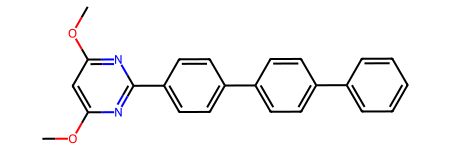

Rank 72: Nc1nc(-c2ccccc2)c(-c2ccc(S)cc2)s1, distance=4.19, similarity=0.37


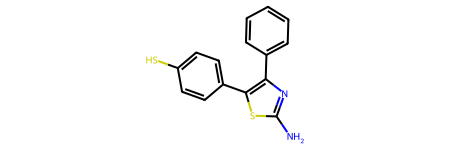

Rank 73: Nc1nc(-c2ccccc2)c(-c2ccc(Cl)cc2)s1, distance=4.24, similarity=0.37


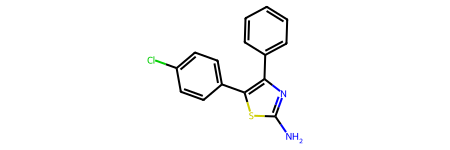

Rank 74: Nc1nc(-c2ccccc2)c(-c2ccc3ccccc3c2)s1, distance=4.07, similarity=0.36


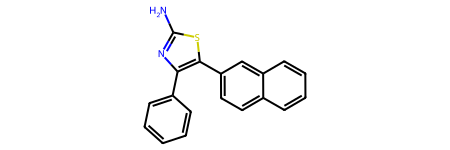

Rank 75: Nc1nc(-c2ccccc2)c(-c2ccc(Cc3ccccc3)cc2)s1, distance=4.29, similarity=0.35


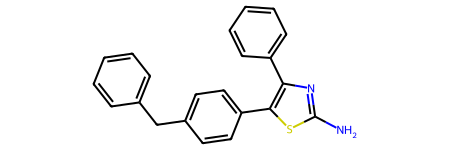

Rank 76: c1ccc(-c2ccnc(-c3ccccc3)c2)cc1, distance=2.62, similarity=0.32


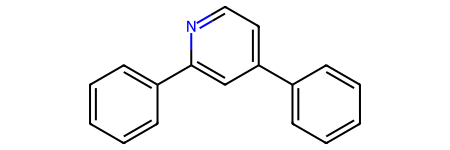

Rank 77: COC(=O)c1cc(-c2ccccc2)c(-c2ccccc2)s1, distance=2.90, similarity=0.31


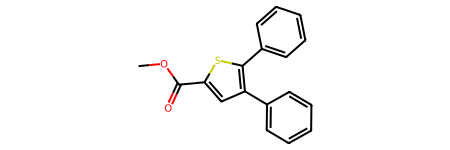

Rank 78: COc1cc(OC)nc(-c2ccc(-c3ccc(Oc4ccccc4)cc3)cc2)n1, distance=3.62, similarity=0.31


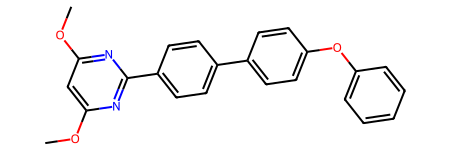

Rank 79: c1ccc(-c2ccc(-c3cc(-c4ccccc4)ccn3)cc2)cc1, distance=3.85, similarity=0.31


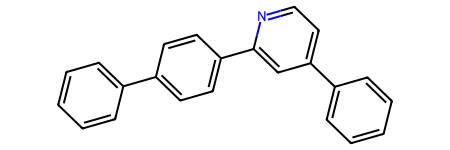

Rank 80: Brc1ccc(-c2cc(-c3ccccc3)ccn2)cc1, distance=3.67, similarity=0.31


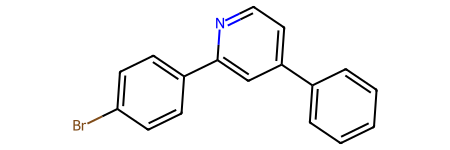

Rank 81: COC(=O)c1cc(-c2ccc(-c3ccccc3)cc2)c(-c2ccccc2)s1, distance=3.28, similarity=0.30


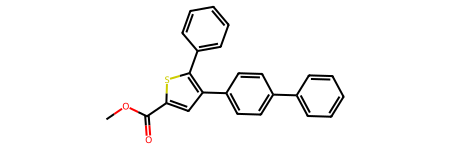

Rank 82: COC(=O)c1cc(-c2ccccc2)c(-c2ccc(-c3ccccc3)cc2)s1, distance=3.48, similarity=0.30


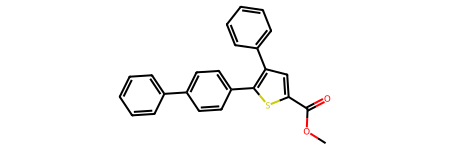

Rank 83: COC(=O)c1cc(-c2ccc(-c3ccccc3)cc2)c(-c2ccc(-c3ccccc3)cc2)s1, distance=3.86, similarity=0.30


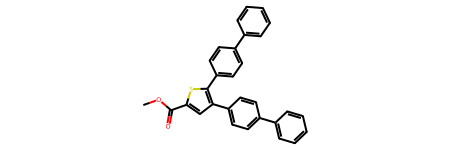

Rank 84: c1ccc(-c2ccnc(-c3ccc4ccccc4c3)c2)cc1, distance=3.92, similarity=0.30


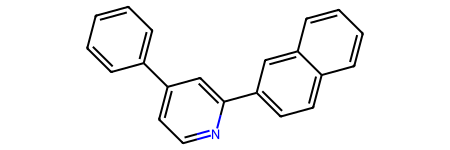

Rank 85: c1ccc(Oc2ccc(-c3cc(-c4ccccc4)ccn3)cc2)cc1, distance=4.08, similarity=0.29


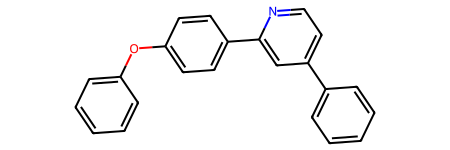

Rank 86: c1ccc(-c2cccnc2-c2ccccc2)cc1, distance=2.78, similarity=0.29


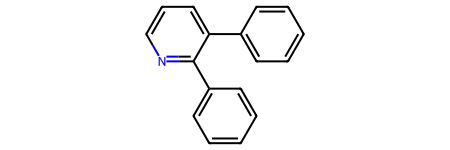

Rank 87: COC(=O)c1cc(-c2ccc(S)cc2)c(-c2ccccc2)s1, distance=3.32, similarity=0.28


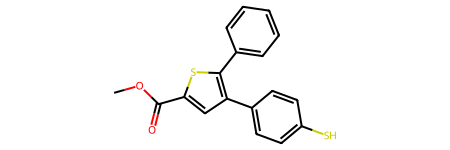

Rank 88: COC(=O)c1cc(-c2ccccc2)c(-c2ccc(S)cc2)s1, distance=3.53, similarity=0.28


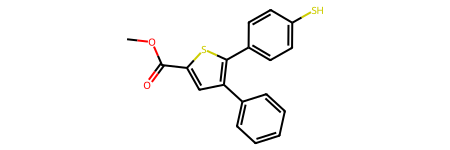

Rank 89: Nc1ccc(-c2cc(-c3ccccc3)ccn2)cc1, distance=3.83, similarity=0.28


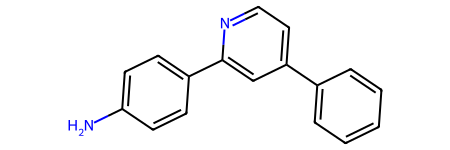

Rank 90: Sc1ccc(-c2cc(-c3ccccc3)ccn2)cc1, distance=4.03, similarity=0.28


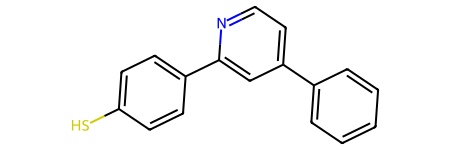

Rank 91: Clc1ccc(-c2cc(-c3ccccc3)ccn2)cc1, distance=4.08, similarity=0.28


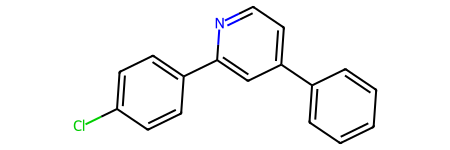

Rank 92: c1ccc(-c2ccc(-c3cccnc3-c3ccccc3)cc2)cc1, distance=3.17, similarity=0.28


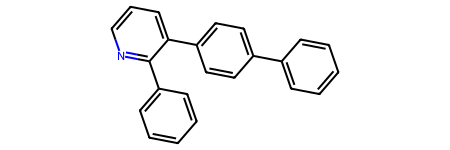

Rank 93: c1ccc(-c2ccc(-c3ncccc3-c3ccccc3)cc2)cc1, distance=3.36, similarity=0.28


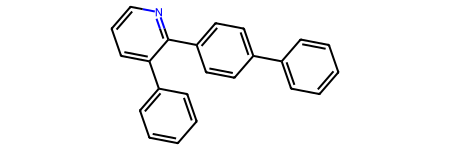

Rank 94: c1ccc(-c2ccc(-c3cccnc3-c3ccc(-c4ccccc4)cc3)cc2)cc1, distance=3.75, similarity=0.28


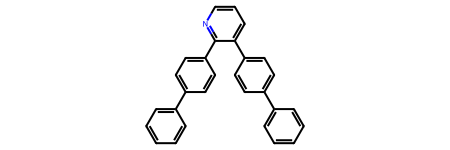

Rank 95: COC(=O)c1cc(-c2ccc(Oc3ccccc3)cc2)c(-c2ccccc2)s1, distance=3.35, similarity=0.28


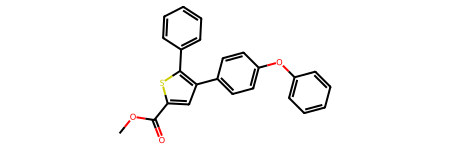

Rank 96: COC(=O)c1cc(-c2ccccc2)c(-c2ccc(Oc3ccccc3)cc2)s1, distance=3.58, similarity=0.28


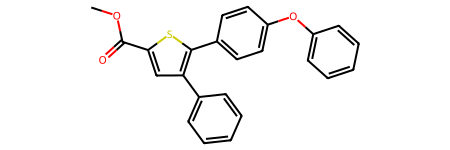

Rank 97: COC(=O)c1cc(-c2ccc(S)cc2)c(-c2ccc(-c3ccccc3)cc2)s1, distance=3.90, similarity=0.28


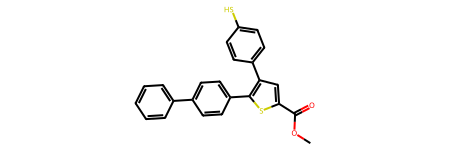

Rank 98: COC(=O)c1cc(-c2ccc(-c3ccccc3)cc2)c(-c2ccc(S)cc2)s1, distance=3.92, similarity=0.28


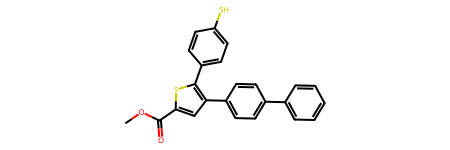

Rank 99: COC(=O)c1cc(-c2ccc(Oc3ccccc3)cc2)c(-c2ccc(-c3ccccc3)cc2)s1, distance=3.93, similarity=0.27


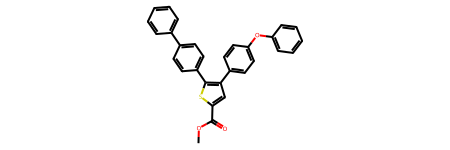

Rank 100: COC(=O)c1cc(-c2ccc(-c3ccccc3)cc2)c(-c2ccc(Oc3ccccc3)cc2)s1, distance=3.97, similarity=0.27


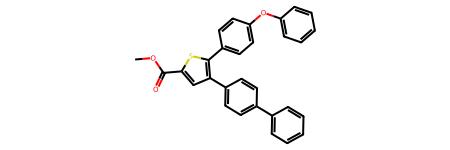

Rank 101: c1ccc(Oc2ccc(-c3cccnc3-c3ccccc3)cc2)cc1, distance=3.24, similarity=0.27


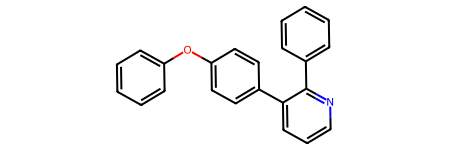

Rank 102: c1ccc(Oc2ccc(-c3ncccc3-c3ccccc3)cc2)cc1, distance=3.47, similarity=0.27


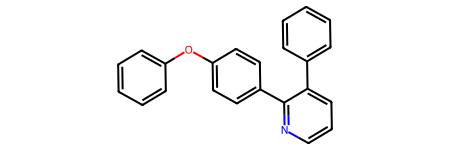

Rank 103: c1ccc(Cc2ccc(-c3cc(-c4ccccc4)ccn3)cc2)cc1, distance=4.13, similarity=0.27


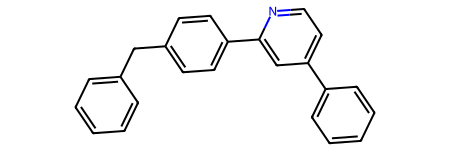

Rank 104: c1ccc(Oc2ccc(-c3cccnc3-c3ccc(-c4ccccc4)cc3)cc2)cc1, distance=3.82, similarity=0.26


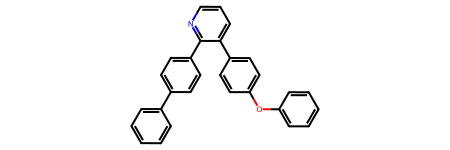

Rank 105: c1ccc(Oc2ccc(-c3ncccc3-c3ccc(-c4ccccc4)cc3)cc2)cc1, distance=3.85, similarity=0.26


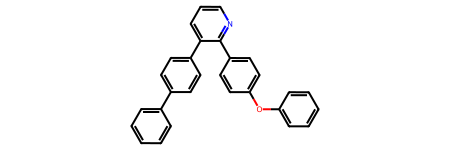

Rank 106: COc1cc(OC)nc(-c2ccc(-c3ccc(S)cc3)cc2)n1, distance=3.57, similarity=0.26


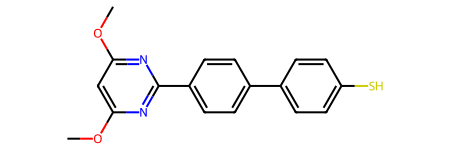

Rank 107: COC(=O)c1cc(-c2ccc(Oc3ccccc3)cc2)c(-c2ccc(Oc3ccccc3)cc2)s1, distance=4.04, similarity=0.26


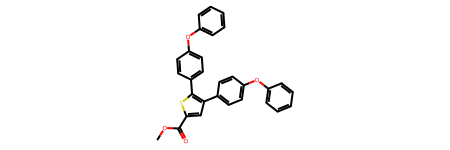

Rank 108: Sc1ccc(-c2cccnc2-c2ccccc2)cc1, distance=3.21, similarity=0.25


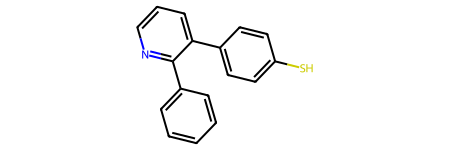

Rank 109: Sc1ccc(-c2ncccc2-c2ccccc2)cc1, distance=3.42, similarity=0.25


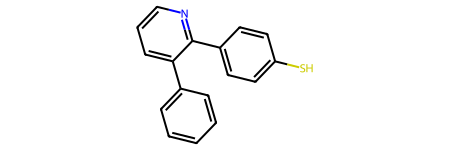

Rank 110: Sc1ccc(-c2cccnc2-c2ccc(-c3ccccc3)cc2)cc1, distance=3.79, similarity=0.25


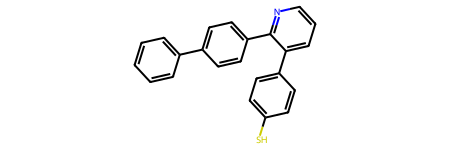

Rank 111: Sc1ccc(-c2ncccc2-c2ccc(-c3ccccc3)cc2)cc1, distance=3.80, similarity=0.25


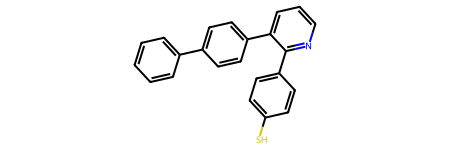

Rank 112: c1ccc(Oc2ccc(-c3cccnc3-c3ccc(Oc4ccccc4)cc3)cc2)cc1, distance=3.93, similarity=0.25


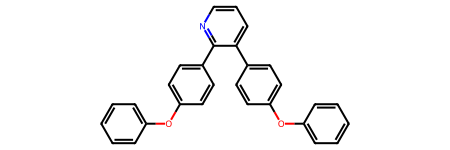

Rank 113: Cc1cc(-c2ccccc2)c2ccccc2n1, distance=4.16, similarity=0.24


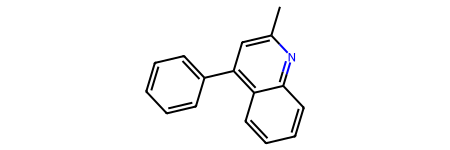

Rank 114: COC(=O)c1cc(-c2ccc(Oc3ccccc3)cc2)c(-c2ccc(S)cc2)s1, distance=3.99, similarity=0.24


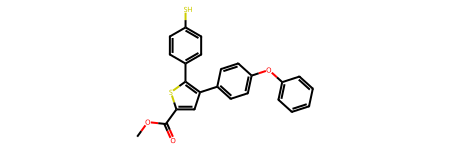

Rank 115: COC(=O)c1cc(-c2ccc(S)cc2)c(-c2ccc(Oc3ccccc3)cc2)s1, distance=4.01, similarity=0.24


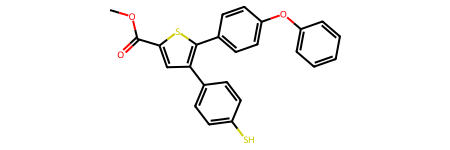

Rank 116: Cc1cc(-c2ccc(-c3ccccc3)cc2)c2ccccc2n1, distance=4.60, similarity=0.23


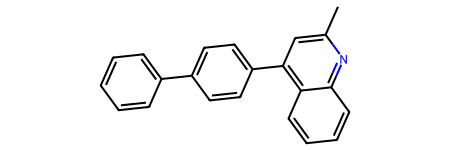

Rank 117: Sc1ccc(-c2ncccc2-c2ccc(Oc3ccccc3)cc2)cc1, distance=3.87, similarity=0.23


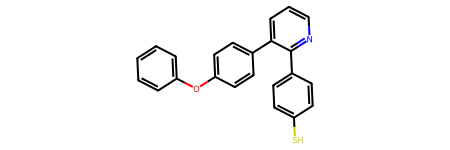

Rank 118: Sc1ccc(-c2cccnc2-c2ccc(Oc3ccccc3)cc2)cc1, distance=3.89, similarity=0.23


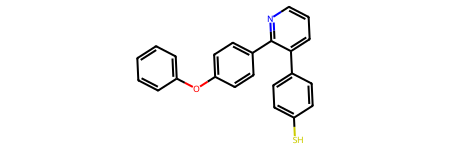

Rank 119: c1ccc(-c2cccc(-c3ccccc3)c2)cc1, distance=3.94, similarity=0.22


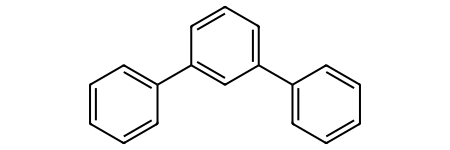

Rank 120: c1ccc(-c2ccc(-c3cccc(-c4ccccc4)c3)cc2)cc1, distance=4.48, similarity=0.21


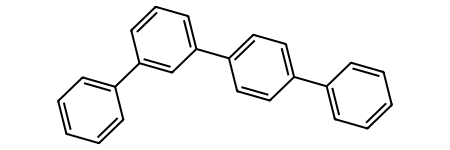

Rank 121: COC(=O)c1cc(-c2ccc(S)cc2)c(-c2ccc(S)cc2)s1, distance=3.95, similarity=0.21


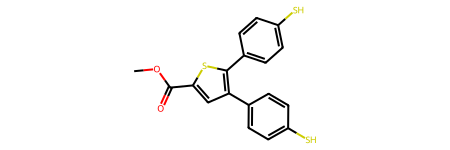

Rank 122: Cc1cc(-c2ccc(Oc3ccccc3)cc2)c2ccccc2n1, distance=4.69, similarity=0.21


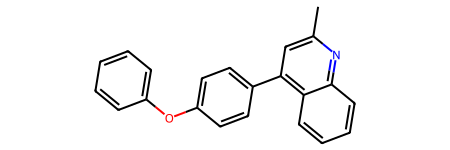

Rank 123: c1ccc(Oc2ccc(-c3cccc(-c4ccccc4)c3)cc2)cc1, distance=4.58, similarity=0.21


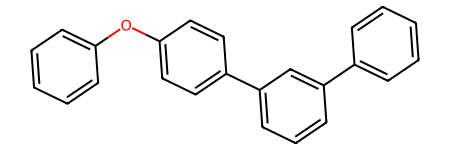

Rank 124: Cc1cc(-c2ccc(S)cc2)c2ccccc2n1, distance=4.65, similarity=0.20


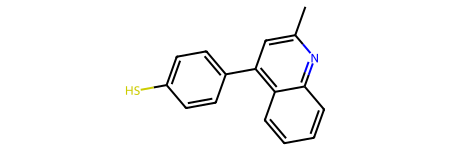

Rank 125: Sc1ccc(-c2cccnc2-c2ccc(S)cc2)cc1, distance=3.84, similarity=0.20


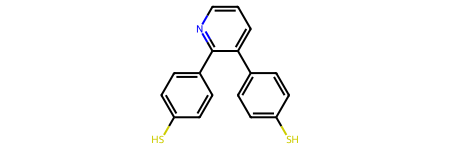

Rank 126: Sc1ccc(-c2cccc(-c3ccccc3)c2)cc1, distance=4.53, similarity=0.19


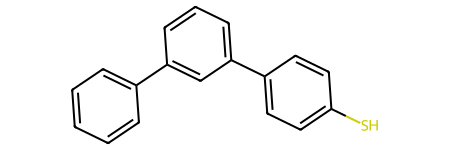

In [7]:
analogs = sort_analogs(analogs, sort_by='similarity')
for i, (analog, result) in enumerate(analogs.items()):
    print ('Rank %d: %s, distance=%.2f, similarity=%.2f' % (i+1, analog, result['distance'], result['similarity']))
    display(Chem.MolFromSmiles(analog))

In [11]:
all_precursor_nodes = sorted(tree.all_precursor_nodes, key=lambda x: -x[1])
for node in all_precursor_nodes:
    node, depth = node
    print (node.smi, depth)
    print (node.bblock_dict)
    node.reaction_filtering()
    analogs = node.get_analogs()
    node.update_bblock_dict(analogs)
    print (node.bblock_dict)
    print ()

CCc1c(Br)c(Cc2ccccc2)c(C)n1Cc1ccc(O)c(OC)c1
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0DD68>], 'distance': [4.795831523312719]}
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0DD68>], 'distance': [4.795831523312719]}

CCc1c(I)c(Cc2ccccc2)c(C)n1Cc1ccc(O)c(OC)c1
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0DDA0>], 'distance': [4.898979485566356]}
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0DDA0>], 'distance': [4.898979485566356]}

CCc1c(Cc2ccccc2)c(C)n(Cc2ccc(O)c(OC)c2)c1Br
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0D9E8>], 'distance': [4.795831523312719]}
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0D9E8>], 'distance': [4.795831523312719]}

CCc1c(Br)c(Cc2ccccc2)c(C)n1Cc1ccc(O)c(OC)c1
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0DD68>], 'distance': [4.795831523312719]}
{'bblock': [<scripts.syntree.MoleculeNode object at 0x0000022334A0DD68>],

In [14]:
all_precursor_nodes = tree.all_precursor_nodes
for node in all_precursor_nodes:
    print (node.smi)
    print (node.bblock_dict)
    node.reaction_filtering()
    analogs = node.get_analogs()
    node.update_bblock_dict(analogs)
    print (node.bblock_dict)
    print ()

CN(C)C(=O)CCl
{'bblock': [<scripts.syntree.MoleculeNode object at 0x000001AEB4CC7DD8>], 'distance': [0.0]}
{'bblock': [<scripts.syntree.MoleculeNode object at 0x000001AEB4CC7DD8>, <scripts.syntree.MoleculeNode object at 0x000001AE99A08668>], 'distance': [0.0, 1.3975424859373686]}

COc1cc(Cn2c(C)c(Cc3ccccc3)c3c2CCCC3)ccc1O
{'bblock': [<scripts.syntree.MoleculeNode object at 0x000001AEB4CC7BE0>], 'distance': [5.291502622129181]}
{'bblock': [<scripts.syntree.MoleculeNode object at 0x000001AEB4CC7BE0>], 'distance': [5.291502622129181]}

CCc1c(Br)c(Cc2ccccc2)c(C)n1Cc1ccc(O)c(OC)c1
{'bblock': [], 'distance': []}
{'bblock': [], 'distance': []}

CCc1c(I)c(Cc2ccccc2)c(C)n1Cc1ccc(O)c(OC)c1
{'bblock': [], 'distance': []}
{'bblock': [], 'distance': []}

CCc1c(Cc2ccccc2)c(C)n(Cc2ccc(O)c(OC)c2)c1Br
{'bblock': [], 'distance': []}
{'bblock': [], 'distance': []}

CN(C)C(=O)CBr
{'bblock': [<scripts.syntree.MoleculeNode object at 0x000001AEB4CC7B38>], 'distance': [2.8284271247461903]}
{'bblock': [<script

In [ ]:
unique_precursors = set()
def collect_precursots(node):
    if not node.children:
        return
    for reaction, children in node.children:
        for child in children:
            unique_precursors.add(child.smi)
            collect_precursots(child)
    return


collect_precursots(tree.target_node)
unique_precursors

In [ ]:
from scripts.syntree import SynTree
from scripts.chem_utils import *

i = 3
target_smi = targets[i]
display(Chem.MolFromSmiles(target_smi))
tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kdtree, max_depth=2)
tree.recursive_expand(tree.target_node, depth=0)

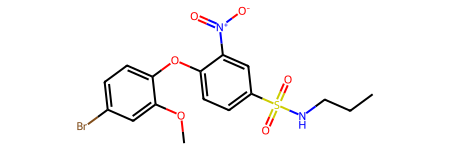

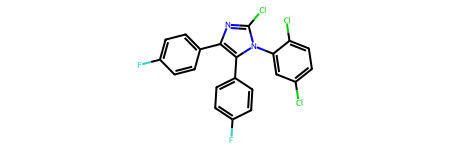

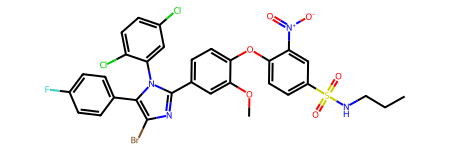

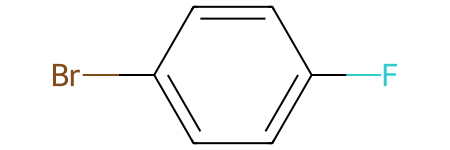

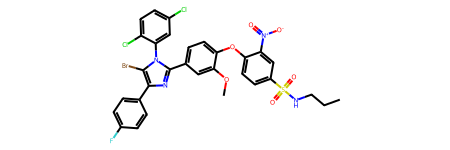

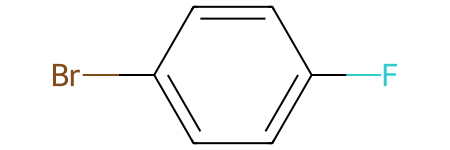

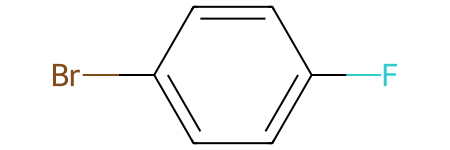

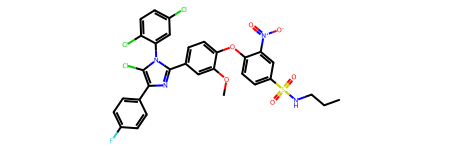

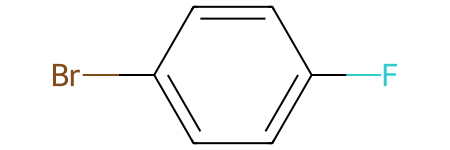

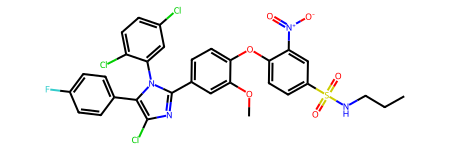

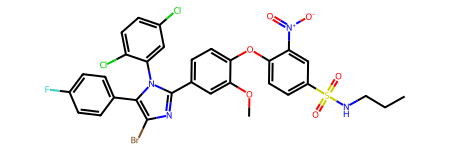

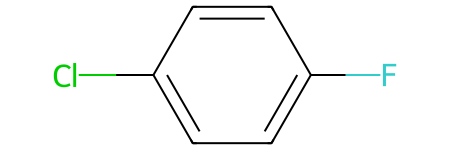

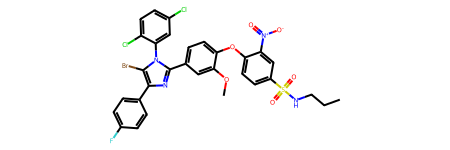

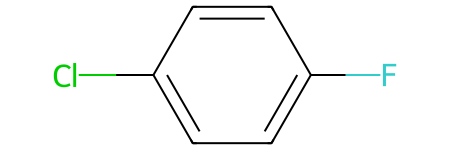

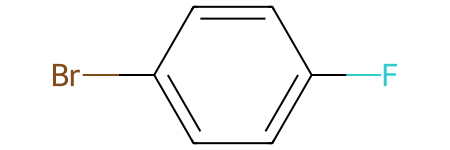

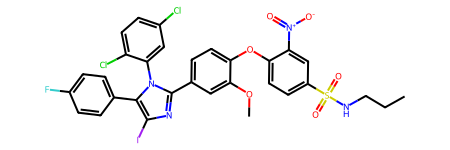

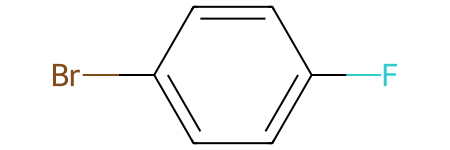

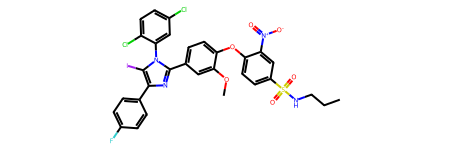

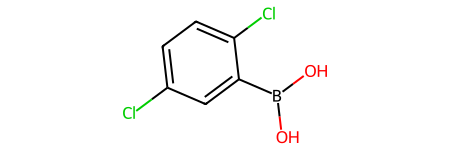

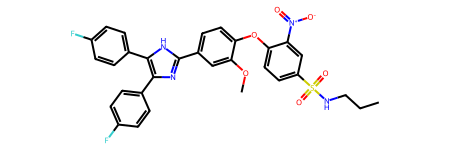

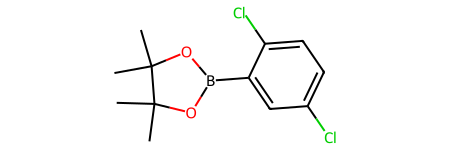

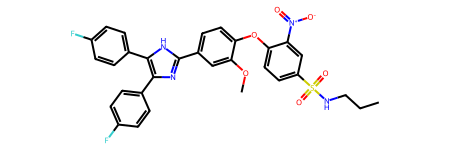

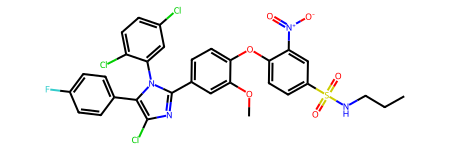

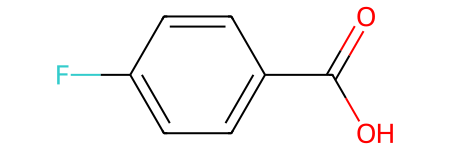

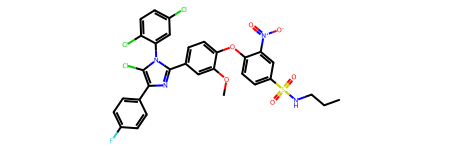

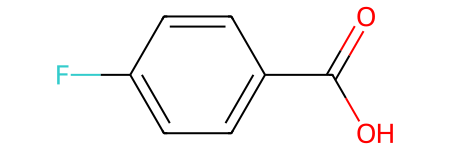

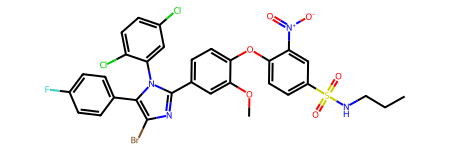

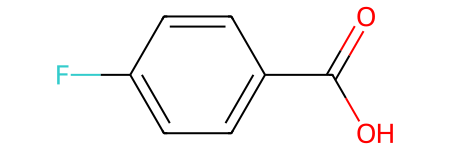

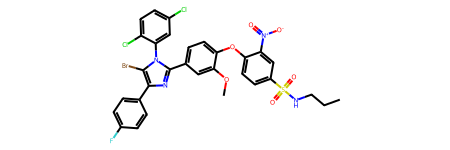

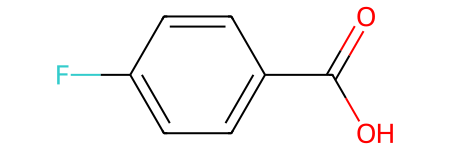

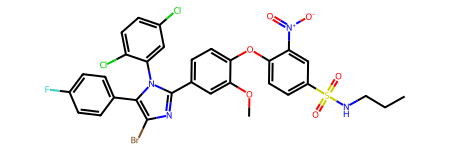

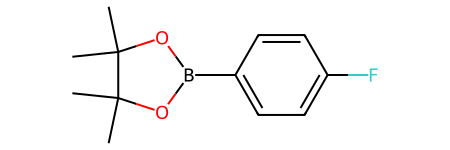

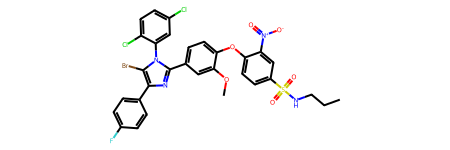

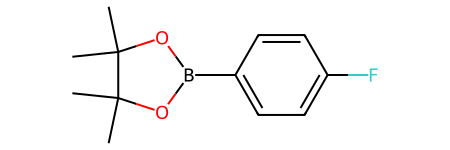

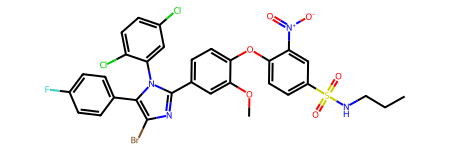

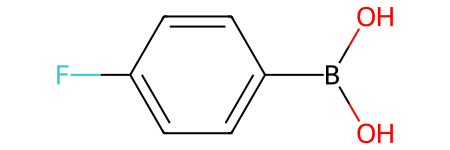

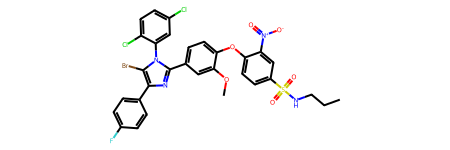

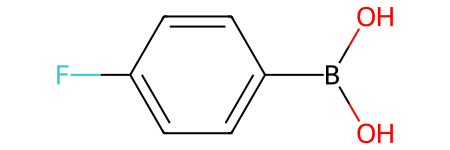

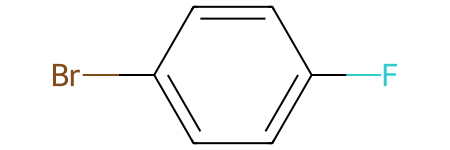

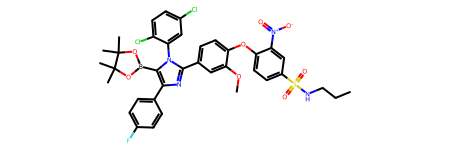

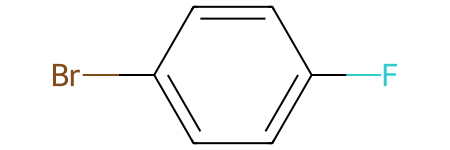

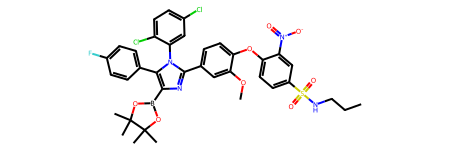

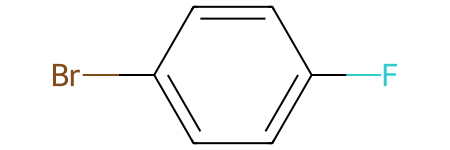

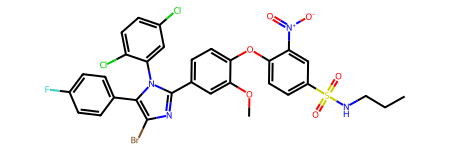

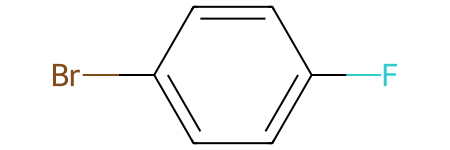

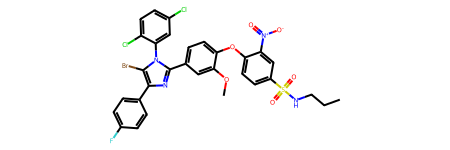

In [20]:
node = tree.unique_precursors['CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1']
for reaction, reactants in node.filtered_children:
    for reactant in reactants:
        display(reactant.mol)
    print ()

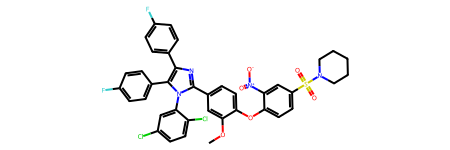

Expanding synthesis tree...
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


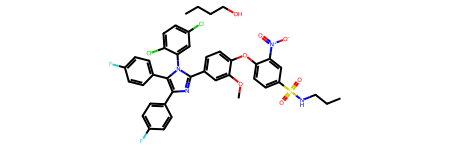

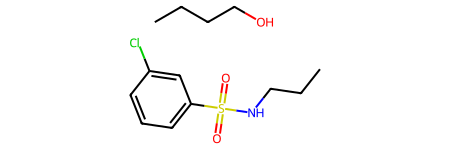

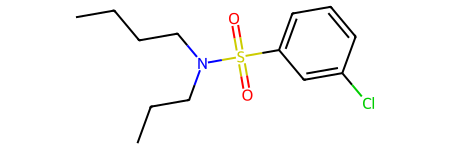

Weighted distance: 5.697191156433626
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


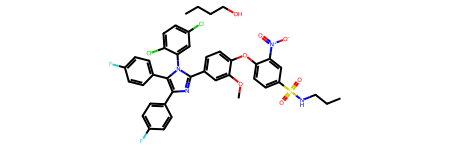

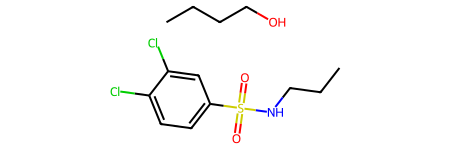

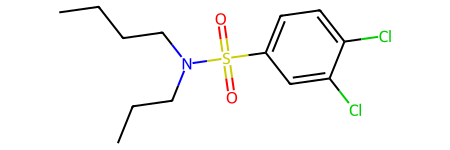

Weighted distance: 5.769769765921254
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


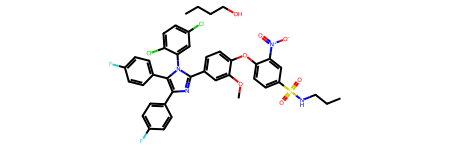

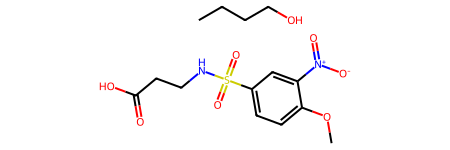

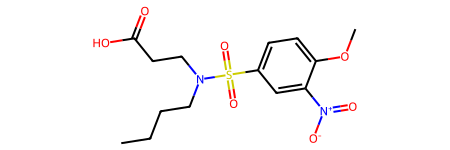

Weighted distance: 5.841446672745756
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


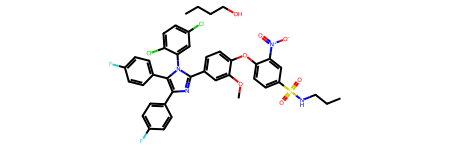

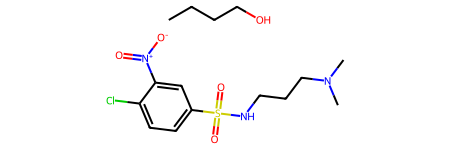

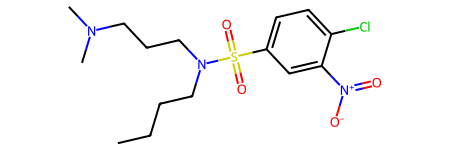

Weighted distance: 5.912254672231731
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


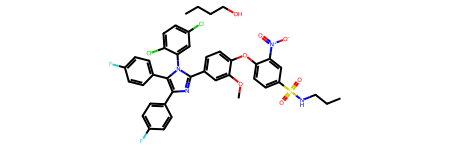

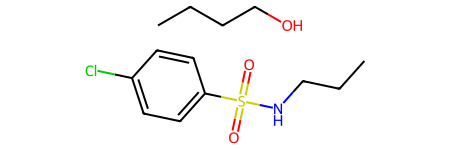

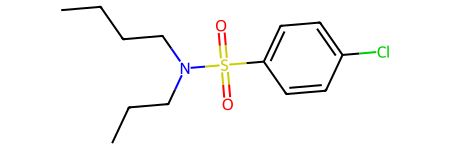

Weighted distance: 5.912254672231731
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


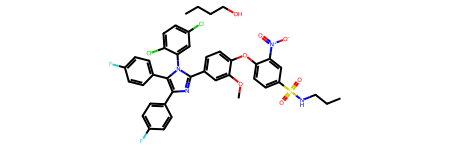

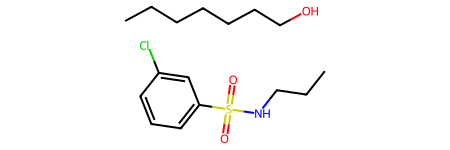

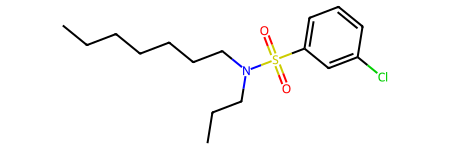

Weighted distance: 5.849125437799316
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


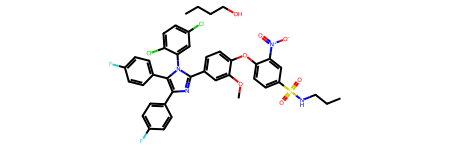

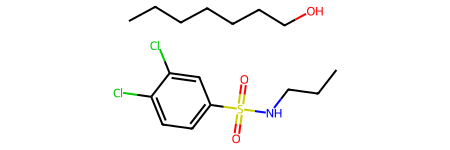

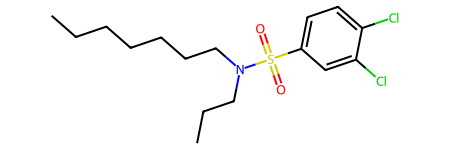

Weighted distance: 5.921704047286944
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


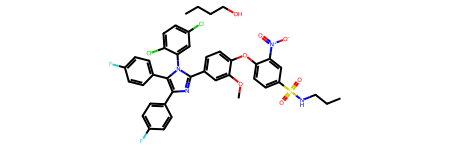

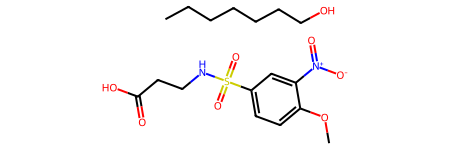

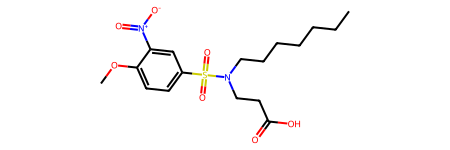

Weighted distance: 5.993380954111447
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


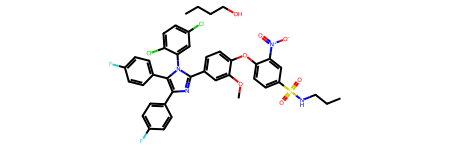

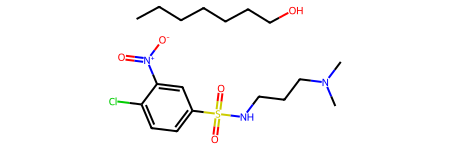

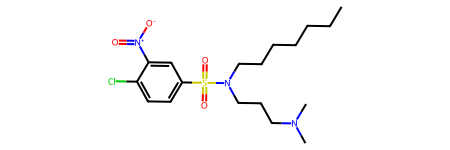

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


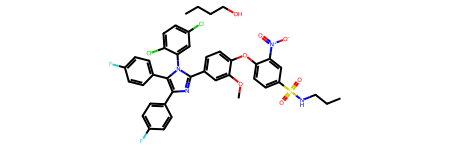

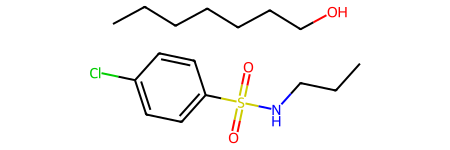

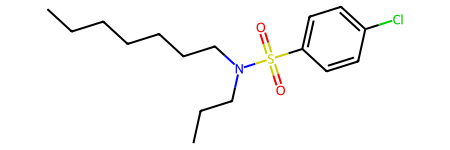

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


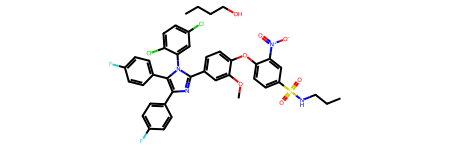

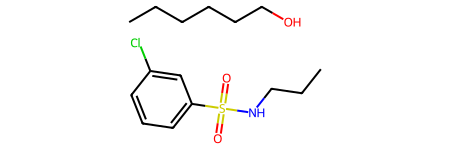

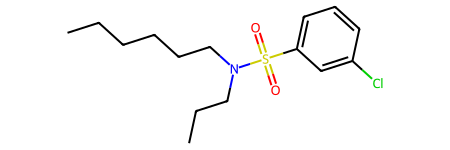

Weighted distance: 5.849125437799316
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


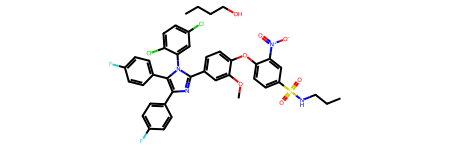

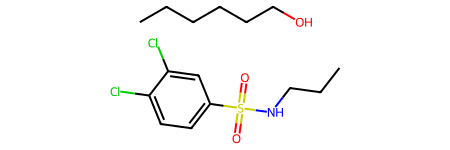

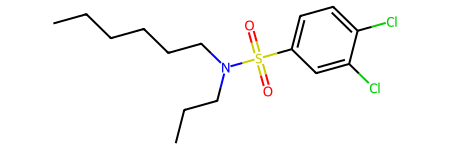

Weighted distance: 5.921704047286944
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


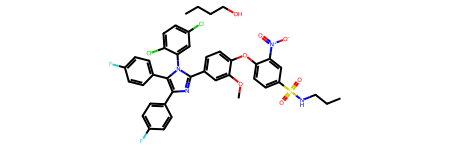

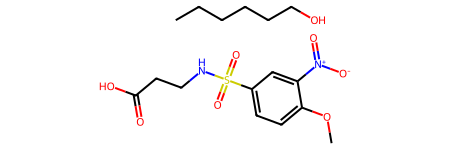

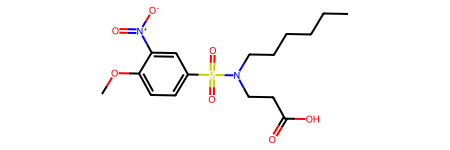

Weighted distance: 5.993380954111447
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


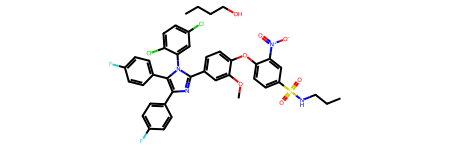

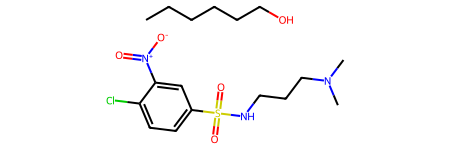

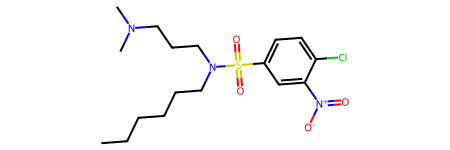

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


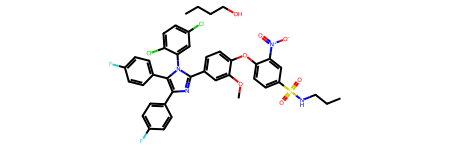

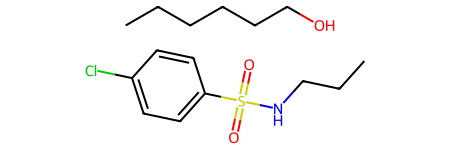

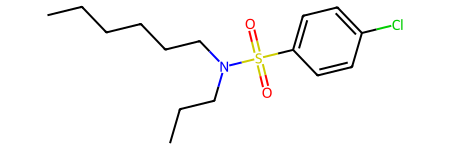

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


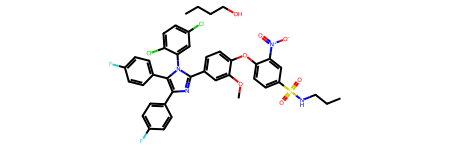

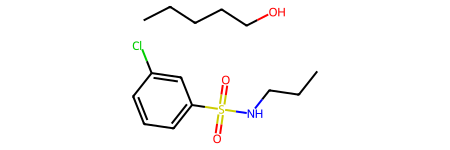

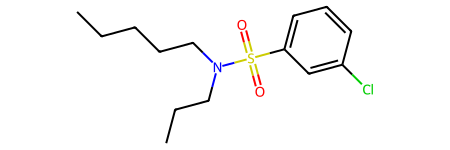

Weighted distance: 5.849125437799316
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


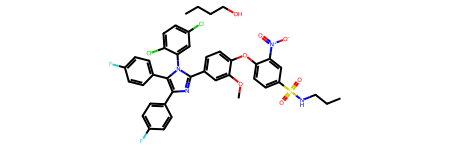

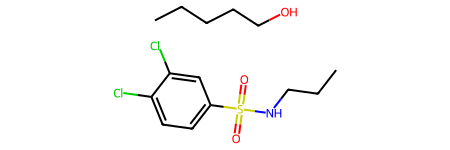

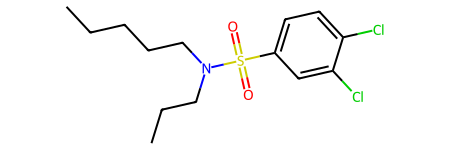

Weighted distance: 5.921704047286944
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


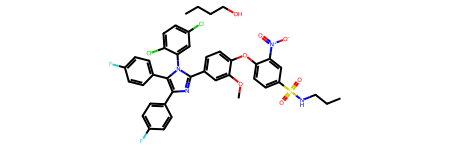

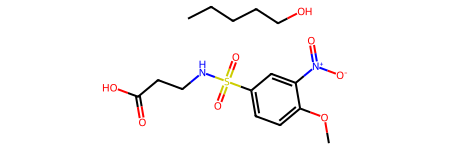

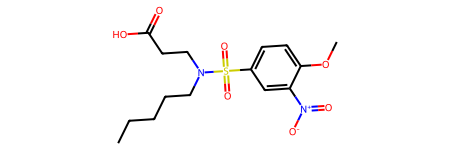

Weighted distance: 5.993380954111447
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


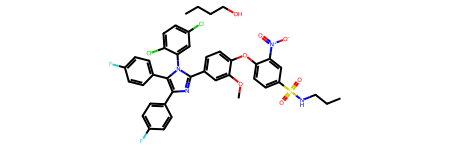

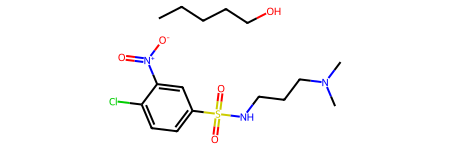

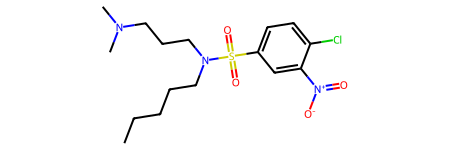

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


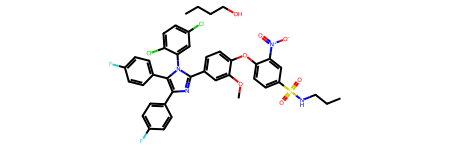

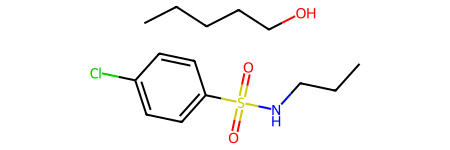

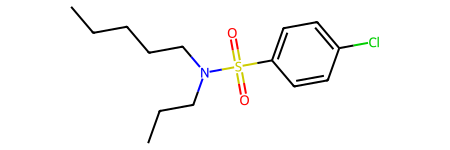

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


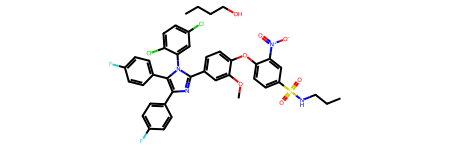

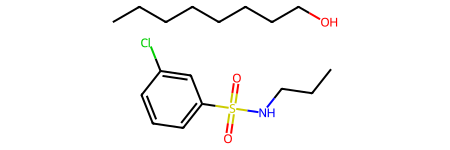

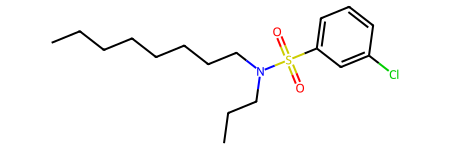

Weighted distance: 5.849125437799316
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


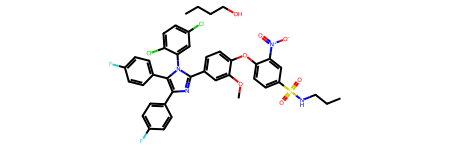

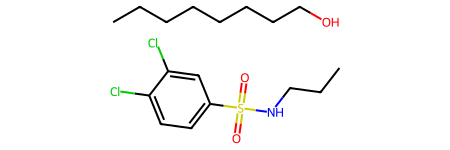

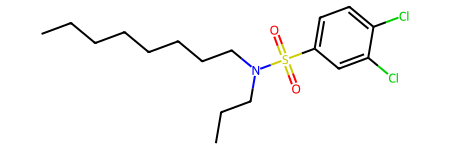

Weighted distance: 5.921704047286944
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


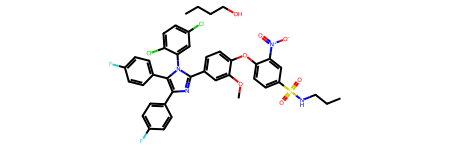

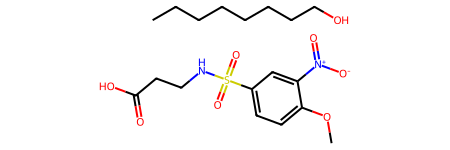

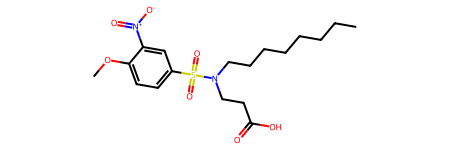

Weighted distance: 5.993380954111447
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


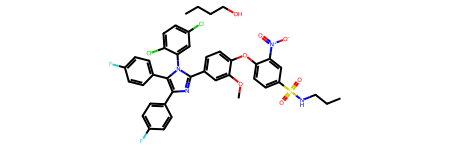

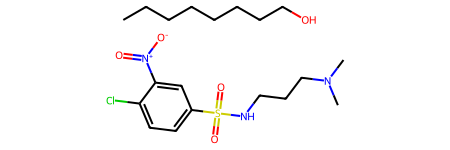

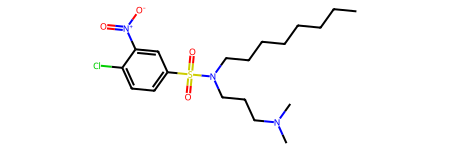

Weighted distance: 6.064188953597423
CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(-c3nc(-c4ccc(F)cc4)c(-c4ccc(F)cc4)n3-c3cc(Cl)ccc3Cl)cc2OC)c([N+](=O)[O-])c1


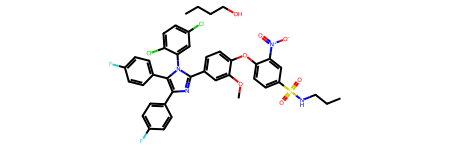

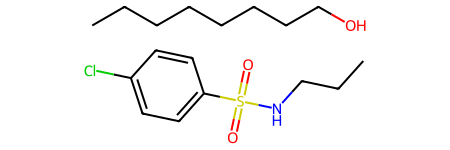

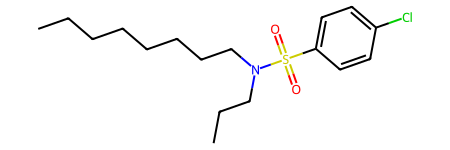

Weighted distance: 6.064188953597423
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


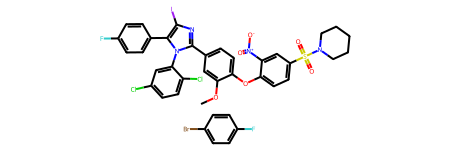

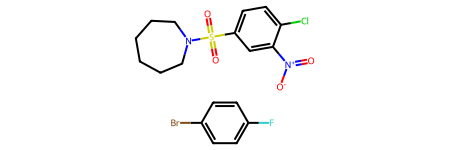

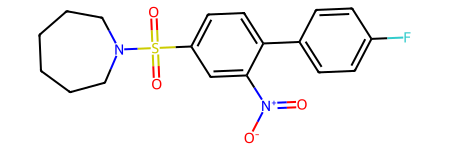

Weighted distance: 5.0709255283711
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


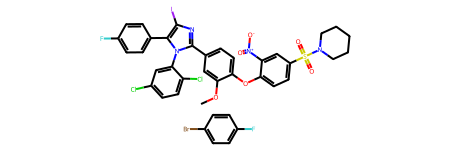

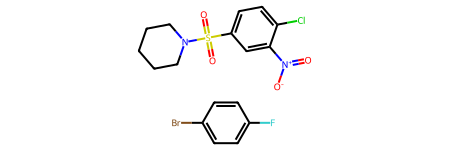

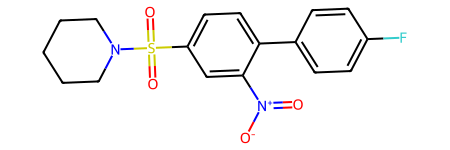

Weighted distance: 5.0709255283711
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


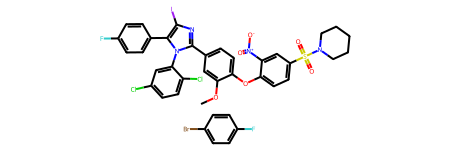

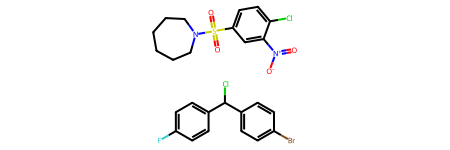

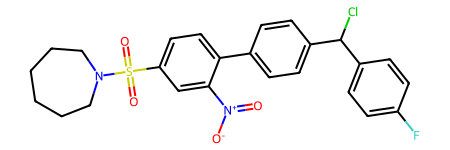

Weighted distance: 5.448890001380327
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


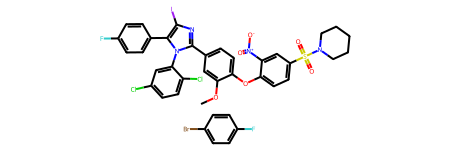

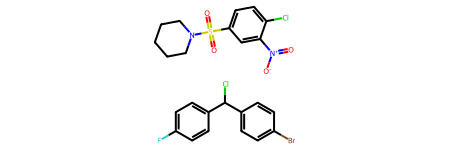

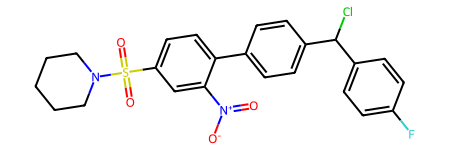

Weighted distance: 5.448890001380327
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


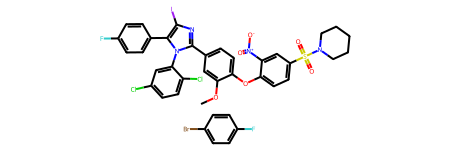

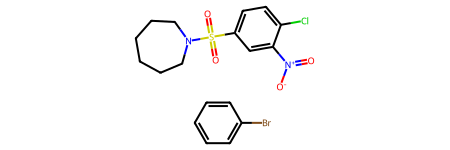

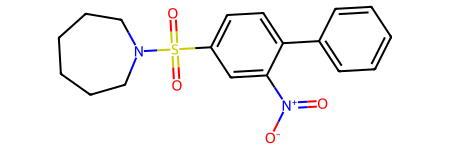

Weighted distance: 5.474986546191984
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


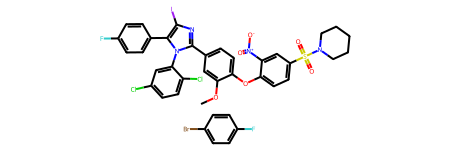

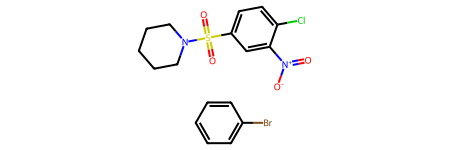

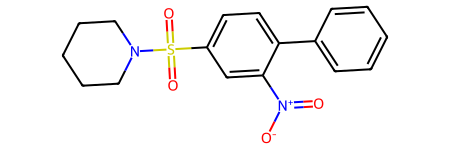

Weighted distance: 5.474986546191984
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


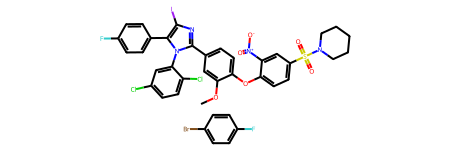

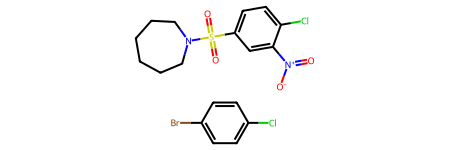

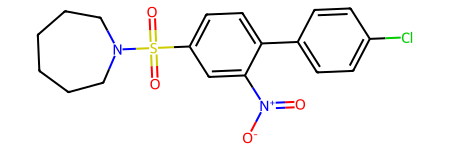

Weighted distance: 5.4994969569425285
Fc1ccc(Br)cc1.COc1cc(-c2nc(I)c(-c3ccc(F)cc3)n2-c2cc(Cl)ccc2Cl)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-]


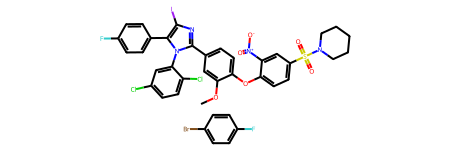

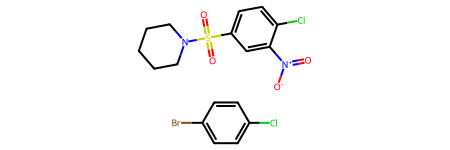

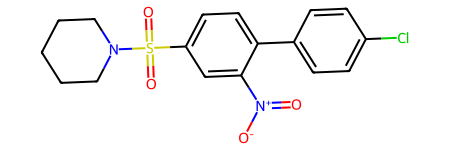

Weighted distance: 5.4994969569425285


In [16]:
from scripts.syntree import SynTree
from scripts.chem_utils import *

i = 9
target_smi = targets[i]
display(Chem.MolFromSmiles(target_smi))
tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kdtree, max_depth=2)
tree.tree_search(k=5)
# print (tree.target_node.filtered_children)
analogs = tree.target_node.get_analogs()
for analog, results in analogs.items():
    print (results['reference precursors'])
    display(Chem.MolFromSmiles(results['reference precursors']))
    display(Chem.MolFromSmiles(results['bblocks']))
    display(Chem.MolFromSmiles(analog))
    print ('Weighted distance:', results['distance'])

In [34]:
target_node = tree.target_node.children[0][1][0]
print (all([all([not node.children for node in nodes]) for (rxn, nodes) in target_node.children]))
target_node.children

True


[]

In [5]:
def generate_analogs(parent_node, depth=0):
    if not parent_node.children: # leaf
        return
    elif all([all([not node.children for node in nodes]) for (rxn, nodes) in parent_node.children]): # second last
        print ('Generating analogs for %s (depth=%d)' % (parent_node.smiles, depth))
        analogs = parent_node.get_analogs()
        print (analogs)
        parent_node.update_bblock_dict(analogs)
        parent_node.reaction_filtering()
        parent_node.synthesis_paths.update(analogs)
        parent_node.bblocks_updated = True

    else:
        depth += 1
        for reaction, nodes in parent_node.children:
            for node in nodes:
                generate_analogs(node, depth)  # Pass a copy of the path
        
    return
parent_node = tree.target_node
print (parent_node.smiles)
generate_analogs(parent_node)

NameError: name 'tree' is not defined

In [36]:
analogs = target_node.get_analogs()
analogs

{}

In [11]:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def visit_from_terminal_to_root(node, path=None):
    if path is None:
        path = []

    # Add the current node to the path
    path.append(node.value)

    # If it's a leaf node (no children), print the path from leaf to root
    if not node.children:
        print(" -> ".join(reversed(path)))  # Print path from leaf to root

    # Recursively visit each child
    for child in node.children:
        visit_from_terminal_to_root(child, path[:])  # Pass a copy of the path

# Example usage:
root = Node("Root")
child1 = Node("Child1")
child2 = Node("Child2")
leaf1 = Node("Leaf1")
leaf2 = Node("Leaf2")

# Construct the tree
child1.children = [leaf1]
child2.children = [leaf2]
root.children = [child1, child2]

# Start from the root and visit from terminal nodes to root
visit_from_terminal_to_root(root)


Leaf1 -> Child1 -> Root
Leaf2 -> Child2 -> Root


In [27]:
for smi, node in tree.unique_precursors.items():
    if not node.children:
        print (smi, node)
        print (node.children)
        break

COc1cc(C=O)ccc1Oc1ccc(S(=O)(=O)N2CCCCC2)cc1[N+](=O)[O-] <scripts.syntree.MoleculeNode object at 0x0000016A33CFE048>
None


In [26]:
tree.retrosynthesis(node)
self.get_knn_bbs(reaction_precursors, k)

[(<scripts.syntree.ReactionNode at 0x16a33d41160>,
  'CCCCO.CCCNS(=O)(=O)c1ccc(Oc2ccc(C=O)cc2OC)c([N+](=O)[O-])c1')]

In [20]:



def generate_analogs(parent_node, depth=0):
    is_second_last = all([all([not node.children for node in nodes]) for (rxn, nodes) in parent_node.children])
    while not parent_node.bblocks_updated or not is_second_last:
        for (rxn, child_nodes) in parent_node.children:
            for child_node in child_nodes:
                print (parent_node.smiles)
                generate_analogs(child_node, depth)
        
    depth += 1
    print ('Generating analogs for %s (depth=%d)' % (parent_node.smiles, depth))
    analogs = parent_node.get_analogs()
    print (analogs)
    parent_node.update_bblock_dict(analogs)
    parent_node.reaction_filtering()
    parent_node.synthesis_paths.update(analogs)
    parent_node.bblocks_updated = True
    return 


parent_node = tree.target_node
generate_analogs(parent_node)

COc1cc(Cn2c(C)c(Cc3ccccc3)c3c2CCCC3)ccc1OCC(=O)N(C)C
CN(C)C(=O)CCl


KeyboardInterrupt: 

In [8]:
tree.unique_precursors

{'CSc1cc(Cl)c(C(F)(F)F)cc1Br': <scripts.syntree.MoleculeNode at 0x2197d3bc048>,
 'CCC1CCCC(N)CC1': <scripts.syntree.MoleculeNode at 0x2197d3bc6d8>,
 'CSc1cc(Cl)c(C(F)(F)F)cc1I': <scripts.syntree.MoleculeNode at 0x2197d3bc5f8>,
 'CSc1cc(Cl)c(C(F)(F)F)cc1Cl': <scripts.syntree.MoleculeNode at 0x2197d3bc518>,
 'CSc1cc(Cl)c(C(F)(F)F)cc1F': <scripts.syntree.MoleculeNode at 0x2197d3bc438>}

In [10]:
def generate_analogs(parent_node, depth=0):   
    depth += 1
    for (rxn, child_nodes) in parent_node.children:
        for child_node in child_nodes:
            print (child_node.smiles, child_node.bblock_dict)
            if parent_node.bblock_dict and not child_node.children and not parent_node.bblocks_updated: # end of the tree
                print ('Generating analogs for %s (depth=%d)' % (parent_node.smiles, depth))
                print (parent_node.bblock_dict)
                print (parent_node.bblock_dict['bblock'])
                analogs = parent_node.get_analogs()
                parent_node.update_bblock_dict(analogs)
                parent_node.reaction_filtering()
                return
            else:
                generate_analogs(child_node, depth)
    return

generate_analogs(tree.target_node)

CSc1cc(Cl)c(C(F)(F)F)cc1Br {'bblock': [<scripts.syntree.MoleculeNode object at 0x000002663440A3C8>, <scripts.syntree.MoleculeNode object at 0x000002661A17E7F0>, <scripts.syntree.MoleculeNode object at 0x000002663440A390>], 'distance': [3.1622776601683795, 3.872983346207417, 4.123105625617661]}
CCC1CCCC(N)CC1 {'bblock': [<scripts.syntree.MoleculeNode object at 0x000002663440A2E8>, <scripts.syntree.MoleculeNode object at 0x000002663440A358>, <scripts.syntree.MoleculeNode object at 0x000002663440A2B0>], 'distance': [0.0, 1.4142135623730951, 2.23606797749979]}
CSc1cc(Cl)c(C(F)(F)F)cc1I {'bblock': [<scripts.syntree.MoleculeNode object at 0x000002663440A208>, <scripts.syntree.MoleculeNode object at 0x000002663440A278>, <scripts.syntree.MoleculeNode object at 0x000002663440A1D0>], 'distance': [3.0, 4.0, 4.123105625617661]}
CCC1CCCC(N)CC1 {'bblock': [<scripts.syntree.MoleculeNode object at 0x000002663440A2E8>, <scripts.syntree.MoleculeNode object at 0x000002663440A358>, <scripts.syntree.Molecu

In [6]:
for reaction, reactants in tree.target_node.children:
    for reactant in reactants:
        print (reactant.smiles)
        print (reactant.analogs)
        print ()

CSc1cc(Cl)c(C(F)(F)F)cc1Br


AttributeError: 'MoleculeNode' object has no attribute 'analogs'

In [ ]:
def get_analogs(target_node):
    results = {}
    for reaction, reactants in target_node.filtered_children:
        work_reaction = reaction.retro_rxn.work_rxn
        knn_bb_smi = [[bblock.smiles for bblock in reactant.bblock_dict['bblock']] for reactant in reactants]
        knn_bb_mols = [[bblock.mol for bblock in reactant.bblock_dict['bblock']] for reactant in reactants]
        knn_distance = [[dist for dist in reactant.bblock_dict['distance']] for reactant in reactants]
        knn_smi_sets = list(itertools.product(*knn_bb_smi))
        knn_mol_sets = list(itertools.product(*knn_bb_mols))
        knn_dist_sets = list(itertools.product(*knn_distance))

        if not knn_dist_sets:
            continue
        for i, (smi_set, mol_set, dist_set) in enumerate(zip(knn_smi_sets, knn_mol_sets, knn_dist_sets)):
            try:
                target_analogs = reaction.run_forward(mol_set)
                weighted_dist = atomic_weighted_mean('.'.join(smi_set), dist_set)
                for analog in target_analogs:
                    if analog not in results or weighted_dist < results[analog][1]:
                        results[analog] = (work_reaction.smirks, '.'.join(smi_set), weighted_dist)
            except Exception as e:
                pass
    target_node.analogs = results
    return target_node

target_node = tree.target_node
target_node = get_analogs(target_node)
target_node.analogs

In [ ]:
target_smi = targets[2]
tree = SynTree(target_smi, loader.retro_rxns, loader.bblocks_smi, kdtree, max_depth=1)
tree.tree_search(k=3)

results = {}
print ('Target:', target_smi)
display(Chem.MolFromSmiles(target_smi))
for reaction, reactants in tree.target_node.filtered_children:
    work_reaction = reaction.retro_rxn.work_rxn
    reactant_smis = [reactant.smiles for reactant in reactants]
    reactant_mols = [reactant.mol for reactant in reactants]
    original_target = reaction.run_forward(reactant_mols)
    
    knn_bb_smi = [[bblock.smiles for bblock in reactant.bblock_dict['bblock']] for reactant in reactants]
    knn_bb_mols = [[bblock.mol for bblock in reactant.bblock_dict['bblock']] for reactant in reactants]
    knn_distance = [[dist for dist in reactant.bblock_dict['distance']] for reactant in reactants]
    knn_smi_sets = list(itertools.product(*knn_bb_smi))
    knn_mol_sets = list(itertools.product(*knn_bb_mols))
    knn_dist_sets = list(itertools.product(*knn_distance))
    
    if not knn_dist_sets:
        continue
#     print ('Work reaction:', work_reaction.smirks)
#     print ('###Original####')
#     print ('Precursor:', reactant_smis)
#     print ('Outcome:', original_target)
    for i, (smi_set, mol_set, dist_set) in enumerate(zip(knn_smi_sets, knn_mol_sets, knn_dist_sets)):
        try:
            target_analogs = reaction.run_forward(mol_set)
            weighted_dist = atomic_weighted_mean('.'.join(smi_set), dist_set)
#             print ('### %d trail: success####' % (i+1))
#             print ('Precursor:', smi_set)
#             print ('Outcome:', target_analogs)
#             print ('Distance:', weighted_dist)
            for analog in target_analogs:
                if analog not in results or weighted_dist < results[analog][1]:
                    results[analog] = (work_reaction.smirks, '.'.join(smi_set), weighted_dist)

        except Exception as e:
            print ('### %d trail: failed####' % (i+1))
            print (e)

results = {k: v for k, v in sorted(results.items(), key=lambda x: x[1][1])}
for i, (product, result) in enumerate(results.items()):
    
    print ('Rank %d product: %s' % (i+1, product))
    display(Chem.MolFromSmiles(product))
    print (result)

In [ ]:
from scripts.data_utils import *

reactants = ['CSc1cc(Cl)c(C(F)(F)F)cc1N', 'CCC1CCCC(N)CC1']
reactants = [Chem.MolFromSmiles(smi) for smi in reactants]
template = '[Cl,Br,I][c;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1].[N;$(NC)&!$(N=*)&!$([N-])&!$(N#*)&!$([ND3])&!$([ND4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]),H2&$(Nc1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):2]>>[c:1][N:2]'
reaction = Reaction(template=template)

In [ ]:
product = reaction.rxn.RunReactants(reactants)
product = product[0][0]
display(product)
Chem.MolToSmiles(product)